In [2]:
import DSGRN
from DSGRN import *
from tetrahedron import *
#from tetrahedron_plus import *
from Elizabeth_tetrahedron_functions import *

plt.rcParams.update({'font.size': 14})

27596782653696


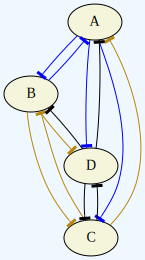

In [3]:
net_name = 'toggle_tetra'
#database = Database(f"/home/elizabeth/Desktop/Tetrahedron/{net_name}.db") 
network = DSGRN.Network(f"/home/elizabeth/Desktop/Tetrahedron/{net_name}.txt") 
network_location = f"/home/elizabeth/Desktop/Tetrahedron/{net_name}.txt"
parameter_graph = DSGRN.ParameterGraph(network)
print(parameter_graph.size())
DrawGraph(network)

In [4]:
import json

n=10000 # DSGRN sample size for each sample taken below

# Load DSGRN sample sets, convert string keys to integers
bar_results0 = {}
with open('/home/elizabeth/Desktop/Tetrahedron/data/bar_results0.json') as f:
    data = json.load(f)
    for string_pgi in data:
        bar_results0[int(string_pgi)] = data[string_pgi]

bar_results1 = {}
with open('/home/elizabeth/Desktop/Tetrahedron/data/bar_results1.json') as f:
    data = json.load(f)
    for string_pgi in data:
        bar_results1[int(string_pgi)] = data[string_pgi]

bar_results2 = {}
with open('/home/elizabeth/Desktop/Tetrahedron/data/bar_results2.json') as f:
    data = json.load(f)
    for string_pgi in data:
        bar_results2[int(string_pgi)] = data[string_pgi]

bar_results3 = {}
with open('/home/elizabeth/Desktop/Tetrahedron/data/bar_results3.json') as f:
    data = json.load(f)
    for string_pgi in data:
        bar_results3[int(string_pgi)] = data[string_pgi]


In [5]:
# Now do thresholding on the fixed points, so any position in FP below 1.5 is assigned 0 
# and anything above is assigned 3

m = 3

bar_results0_wt = apply_thresholding_to_datasets(bar_results0, m)
bar_results1_wt = apply_thresholding_to_datasets(bar_results1, m)
bar_results2_wt = apply_thresholding_to_datasets(bar_results2, m)
bar_results3_wt = apply_thresholding_to_datasets(bar_results3, m)

In [6]:
# All FPs Possible 
all_states = [(0,m,0,m),(0,0,m,m),(m,0,0,m),(0,m,m,0),(m,m,0,0),(m,0,m,0),(m,0,m,m),(m,m,m,0),(0,m,m,m),(m,m,0,m),(m,0,0,0),(0,0,0,m),(0,0,m,0),(0,m,0,0),(m,m,m,m),(0,0,0,0)]

### DSGRN Frequency Tables and Charts for All States, Monostable and Bistable 

In [7]:
all_state_counts_0 = all_state_phase_freq(bar_results0_wt, all_states)
mono_state_counts_0 = mono_state_phase_freq(bar_results0_wt, all_states)
bi_state_counts_0 = bi_state_phase_freq(bar_results0_wt, all_states)

all_state_counts_1 = all_state_phase_freq(bar_results1_wt, all_states)
mono_state_counts_1 = mono_state_phase_freq(bar_results1_wt, all_states)
bi_state_counts_1 = bi_state_phase_freq(bar_results1_wt, all_states)

all_state_counts_2 = all_state_phase_freq(bar_results2_wt, all_states)
mono_state_counts_2 = mono_state_phase_freq(bar_results2_wt, all_states)
bi_state_counts_2 = bi_state_phase_freq(bar_results2_wt, all_states)

all_state_counts_3 = all_state_phase_freq(bar_results3_wt, all_states)
mono_state_counts_3 = mono_state_phase_freq(bar_results3_wt, all_states)
bi_state_counts_3 = bi_state_phase_freq(bar_results3_wt, all_states)

In [8]:
# print out results for excel
import statistics as stat

print('All State Counts')
print('FP & Sample 1 & Sampe 2 & Sample 3 & Sample 4 & Average & Sd. Dev.')
for fp in all_states:
    all = [all_state_counts_0[fp], all_state_counts_1[fp], all_state_counts_2[fp], all_state_counts_3[fp]]
    avg = sum(all)/4
    sd = stat.stdev(all)
    print(fp, ' & ', all_state_counts_0[fp], ' & ', all_state_counts_1[fp], ' & ', all_state_counts_2[fp], ' & ', all_state_counts_3[fp], ' & ', avg, ' & ', sd)
print('\n')
print('Monostable State Counts')
print('FP & Sample 1 & Sampe 2 & Sample 3 & Sample 4 & Average & Sd. Dev.')
for fp in all_states:
    all = [mono_state_counts_0[fp], mono_state_counts_1[fp], mono_state_counts_2[fp], mono_state_counts_3[fp]]
    avg = sum(all)/4
    sd = stat.stdev(all)
    print(fp, ' & ', mono_state_counts_0[fp], ' & ', mono_state_counts_1[fp], ' & ', mono_state_counts_2[fp], ' & ', mono_state_counts_3[fp], ' & ', avg, ' & ', sd)
print('\n')
print('Bistable State Counts')
print('FP & Sample 1 & Sampe 2 & Sample 3 & Sample 4 & Average & Sd. Dev.')
for fp in bi_state_counts_0:
    all = [bi_state_counts_0[fp], bi_state_counts_1[fp], bi_state_counts_2[fp], bi_state_counts_3[fp]]
    avg = sum(all)/4
    sd = stat.stdev(all)
    print(fp[0], ' & ', fp[1], ' & ', bi_state_counts_0[fp], ' & ', bi_state_counts_1[fp], ' & ', bi_state_counts_2[fp], ' & ', bi_state_counts_3[fp], ' & ', avg, ' & ', sd)


All State Counts
FP & Sample 1 & Sampe 2 & Sample 3 & Sample 4 & Average & Sd. Dev.
(0, 3, 0, 3)  &  2333  &  2249  &  2271  &  2276  &  2282.25  &  35.80851853958776
(0, 0, 3, 3)  &  2264  &  2299  &  2330  &  2249  &  2285.5  &  36.318039594669756
(3, 0, 0, 3)  &  2283  &  2245  &  2249  &  2225  &  2250.5  &  24.0762677063258
(0, 3, 3, 0)  &  2292  &  2273  &  2166  &  2257  &  2247.0  &  55.86292748027682
(3, 3, 0, 0)  &  2239  &  2217  &  2339  &  2215  &  2252.5  &  58.682762943360686
(3, 0, 3, 0)  &  2303  &  2309  &  2257  &  2281  &  2287.5  &  23.629078131263043
(3, 0, 3, 3)  &  496  &  524  &  477  &  510  &  501.75  &  20.072784228070272
(3, 3, 3, 0)  &  501  &  508  &  483  &  496  &  497.0  &  10.55146119422961
(0, 3, 3, 3)  &  486  &  502  &  598  &  511  &  524.25  &  50.24191477242881
(3, 3, 0, 3)  &  568  &  483  &  542  &  507  &  525.0  &  37.532208390483326
(3, 0, 0, 0)  &  541  &  532  &  531  &  502  &  526.5  &  16.941074346097416
(0, 0, 0, 3)  &  521  &  540  &

In [9]:
all_results = {}
for fp in all_states:
    all = [all_state_counts_0[fp]/n, all_state_counts_1[fp]/n, all_state_counts_2[fp]/n, all_state_counts_3[fp]/n]
    avg = sum(all)/4
    sd = stat.stdev(all)
    all_results[fp] = (avg, sd)

mono_results = {}
for fp in all_states:
    all = [mono_state_counts_0[fp]/n, mono_state_counts_1[fp]/n, mono_state_counts_2[fp]/n, mono_state_counts_3[fp]/n]
    avg = sum(all)/4
    sd = stat.stdev(all)
    mono_results[fp] = (avg, sd)

bi_results = {}
for fp in bi_state_counts_0:
    all = [bi_state_counts_0[fp]/n, bi_state_counts_1[fp]/n, bi_state_counts_2[fp]/n, bi_state_counts_3[fp]/n]
    avg = sum(all)/4
    sd = stat.stdev(all)
    bi_results[fp] = (avg, sd)


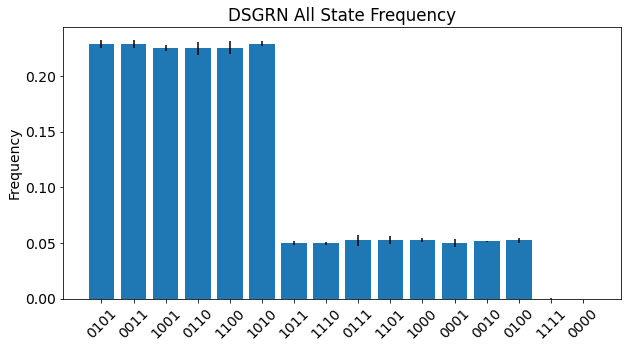

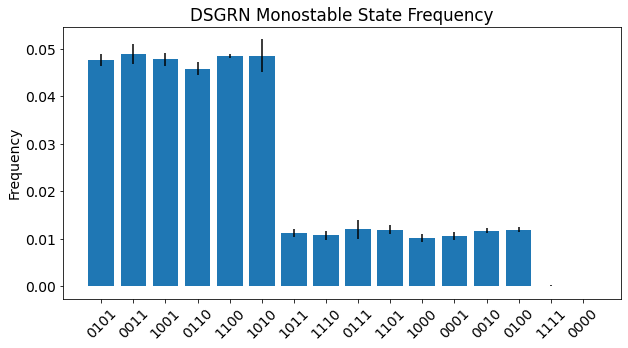

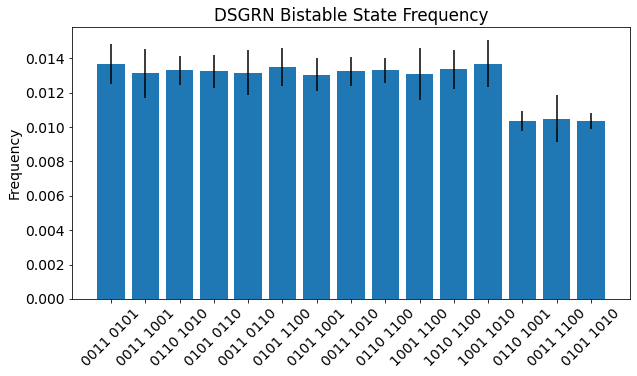

In [10]:
labels = [str(int(fp[0]/m)) + str(int(fp[1]/m)) +str(int(fp[2]/m)) +str(int(fp[3]/m)) for fp in all_states]

x_pos = list(range(len(labels)))
height = [all_results[fp][0] for fp in all_states]
err = [all_results[fp][1] for fp in all_states]

fig, ax = plt.subplots(figsize=(10,5))
ax.bar(x_pos, height, yerr=err, align='center', ecolor='black')
ax.set_xticks(x_pos)
ax.set_xticklabels(labels, rotation = 45)

plt.title('DSGRN All State Frequency')
plt.ylabel('Frequency')
figname = '/home/elizabeth/Desktop/Tetrahedron/figures/DSGRN_all_state_freq.png'
plt.savefig(figname)
plt.show()

height = [mono_results[fp][0] for fp in all_states]
err = [mono_results[fp][1] for fp in all_states]

fig, ax = plt.subplots(figsize=(10,5))
ax.bar(x_pos, height, yerr=err, align='center', ecolor='black')
ax.set_xticks(x_pos)
ax.set_xticklabels(labels, rotation = 45)

plt.title('DSGRN Monostable State Frequency')
plt.ylabel('Frequency')
figname = '/home/elizabeth/Desktop/Tetrahedron/figures/DSGRN_mono_state_freq.png'
plt.savefig(figname)
plt.show()


order = [((0, 0, m, m), (0, m, 0, m)), ((0, 0, m, m), (m, 0, 0, m)), ((0, m, m, 0), (m, 0, m, 0)), ((0, m, 0, m), (0, m, m, 0)), 
    ((0, 0, m, m), (0, m, m, 0)), ((0, m, 0, m), (m, m, 0, 0)), ((0, m, 0, m), (m, 0, 0, m)), ((0, 0, m, m), (m, 0, m, 0)),
    ((0, m, m, 0), (m, m, 0, 0)), ((m, 0, 0, m), (m, m, 0, 0)), ((m, 0, m, 0), (m, m, 0, 0)), ((m, 0, 0, m), (m, 0, m, 0)),
    ((0, m, m, 0), (m, 0, 0, m)), ((0, 0, m, m), (m, m, 0, 0)), ((0, m, 0, m), (m, 0, m, 0))]
 
labels = [str(int(fp1[0]/m)) + str(int(fp1[1]/m)) +str(int(fp1[2]/m)) +str(int(fp1[3]/m)) + ' ' + str(int(fp2[0]/m)) + str(int(fp2[1]/m)) +str(int(fp2[2]/m)) +str(int(fp2[3]/m)) for fp1,fp2 in order]
labels

x_pos = list(range(len(labels)))
height = [bi_results[(fp1,fp2)][0] if (fp1,fp2) in bi_results else bi_results[(fp2,fp1)][0] for fp1,fp2 in order]
err = [bi_results[(fp1,fp2)][1] if (fp1,fp2) in bi_results else bi_results[(fp2,fp1)][1] for fp1,fp2 in order]

fig, ax = plt.subplots(figsize=(10,5))
ax.bar(x_pos, height, yerr=err, align='center', ecolor='black')
ax.set_xticks(x_pos)
ax.set_xticklabels(labels, rotation = 45)

plt.title('DSGRN Bistable State Frequency')
plt.ylabel('Frequency')
figname = '/home/elizabeth/Desktop/Tetrahedron/figures/DSGRN_bi_state_freq.png'
plt.savefig(figname)
plt.show()


### Strict Boolean Frequency Tables and Charts for All States, Monostable and Bistable 

In [11]:
strict_Bool_results = get_boolean_stable_Morse_sets(network_location)

Number of strict Boolean parameters: 6561


In [12]:
all_state_counts = all_state_phase_freq(strict_Bool_results, all_states)
mono_state_counts = mono_state_phase_freq(strict_Bool_results, all_states)
bi_state_counts = bi_state_phase_freq(strict_Bool_results, all_states)

In [13]:
# print out results for excel
import statistics as stat

print('All State Counts')
print('FP & Count')
for fp in all_states:
    print(fp, ' & ', all_state_counts[fp])
print('\n')
print('Monostable State Counts')
print('FP & Count')
for fp in all_states:
    print(fp, ' & ', mono_state_counts[fp])
print('\n')
print('Bistable State Counts')
print('FP & Count')
for fp in bi_state_counts:
    print(fp[0], ' & ', fp[1], ' & ', bi_state_counts[fp])


All State Counts
FP & Count
(0, 3, 0, 3)  &  2401
(0, 0, 3, 3)  &  2401
(3, 0, 0, 3)  &  2401
(0, 3, 3, 0)  &  2401
(3, 3, 0, 0)  &  2401
(3, 0, 3, 0)  &  2401
(3, 0, 3, 3)  &  72
(3, 3, 3, 0)  &  72
(0, 3, 3, 3)  &  72
(3, 3, 0, 3)  &  72
(3, 0, 0, 0)  &  72
(0, 0, 0, 3)  &  72
(0, 0, 3, 0)  &  72
(0, 3, 0, 0)  &  72
(3, 3, 3, 3)  &  0
(0, 0, 0, 0)  &  0


Monostable State Counts
FP & Count
(0, 3, 0, 3)  &  233
(0, 0, 3, 3)  &  233
(3, 0, 0, 3)  &  233
(0, 3, 3, 0)  &  233
(3, 3, 0, 0)  &  233
(3, 0, 3, 0)  &  233
(3, 0, 3, 3)  &  33
(3, 3, 3, 0)  &  33
(0, 3, 3, 3)  &  33
(3, 3, 0, 3)  &  33
(3, 0, 0, 0)  &  33
(0, 0, 0, 3)  &  33
(0, 0, 3, 0)  &  33
(0, 3, 0, 0)  &  33
(3, 3, 3, 3)  &  0
(0, 0, 0, 0)  &  0


Bistable State Counts
FP & Count
(0, 3, 0, 3)  &  (0, 0, 3, 3)  &  169
(0, 3, 0, 3)  &  (3, 0, 0, 3)  &  169
(0, 3, 0, 3)  &  (0, 3, 3, 0)  &  169
(0, 3, 0, 3)  &  (3, 3, 0, 0)  &  169
(0, 3, 0, 3)  &  (3, 0, 3, 0)  &  24
(0, 3, 0, 3)  &  (3, 0, 3, 3)  &  7
(0, 3, 0, 3)  &  (3, 

In [14]:
n = 6561
all_state_freq = all_state_phase_freq(strict_Bool_results, all_states, n)
mono_state_freq = mono_state_phase_freq(strict_Bool_results, all_states, n)
bi_state_freq = bi_state_phase_freq(strict_Bool_results, all_states, n)

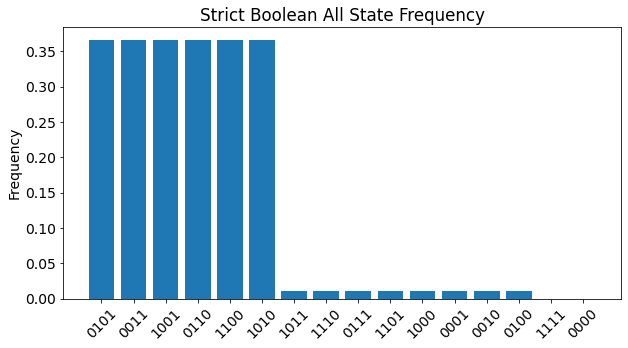

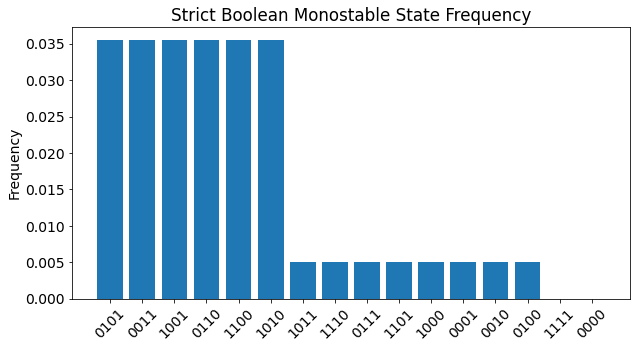

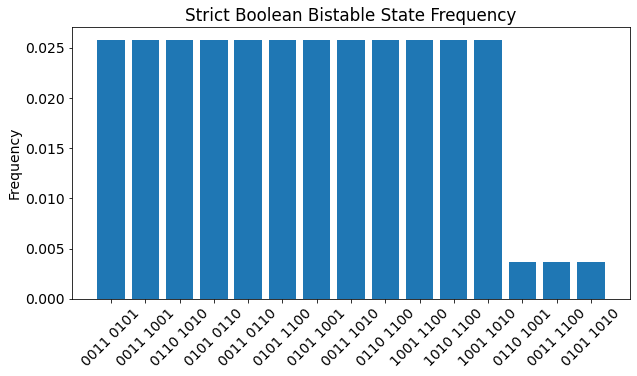

In [15]:
labels = [str(int(fp[0]/m)) + str(int(fp[1]/m)) +str(int(fp[2]/m)) +str(int(fp[3]/m)) for fp in all_states]

x_pos = list(range(len(labels)))
height = [all_state_freq[fp] for fp in all_states]

fig, ax = plt.subplots(figsize=(10,5))
ax.bar(x_pos, height, align='center', ecolor='black')
ax.set_xticks(x_pos)
ax.set_xticklabels(labels, rotation = 45)

plt.title('Strict Boolean All State Frequency')
plt.ylabel('Frequency')
figname = '/home/elizabeth/Desktop/Tetrahedron/figures/SB_all_state_freq.png'
plt.savefig(figname)
plt.show()

height = [mono_state_freq[fp] for fp in all_states]

fig, ax = plt.subplots(figsize=(10,5))
ax.bar(x_pos, height, align='center', ecolor='black')
ax.set_xticks(x_pos)
ax.set_xticklabels(labels, rotation = 45)

plt.title('Strict Boolean Monostable State Frequency')
plt.ylabel('Frequency')
figname = '/home/elizabeth/Desktop/Tetrahedron/figures/SM_Mono_state_freq.png'
plt.savefig(figname)
plt.show()

order = [((0, 0, m, m), (0, m, 0, m)), ((0, 0, m, m), (m, 0, 0, m)), ((0, m, m, 0), (m, 0, m, 0)), ((0, m, 0, m), (0, m, m, 0)), 
    ((0, 0, m, m), (0, m, m, 0)), ((0, m, 0, m), (m, m, 0, 0)), ((0, m, 0, m), (m, 0, 0, m)), ((0, 0, m, m), (m, 0, m, 0)),
    ((0, m, m, 0), (m, m, 0, 0)), ((m, 0, 0, m), (m, m, 0, 0)), ((m, 0, m, 0), (m, m, 0, 0)), ((m, 0, 0, m), (m, 0, m, 0)),
    ((0, m, m, 0), (m, 0, 0, m)), ((0, 0, m, m), (m, m, 0, 0)), ((0, m, 0, m), (m, 0, m, 0))]
 
labels = [str(int(fp1[0]/m)) + str(int(fp1[1]/m)) +str(int(fp1[2]/m)) +str(int(fp1[3]/m)) + ' ' + str(int(fp2[0]/m)) + str(int(fp2[1]/m)) +str(int(fp2[2]/m)) +str(int(fp2[3]/m)) for fp1,fp2 in order]
labels

x_pos = list(range(len(labels)))
height = [bi_state_freq[(fp1,fp2)] if (fp1,fp2) in bi_state_freq else bi_state_freq[(fp2,fp1)] for fp1,fp2 in order]

fig, ax = plt.subplots(figsize=(10,5))
ax.bar(x_pos, height, align='center', ecolor='black')
ax.set_xticks(x_pos)
ax.set_xticklabels(labels, rotation = 45)

plt.title('Strict Boolean Bistable State Frequency')
plt.ylabel('Frequency')
figname = '/home/elizabeth/Desktop/Tetrahedron/figures/SB_bi_state_freq.png'
plt.savefig(figname)
plt.show()

### Regression Plots


In [29]:
import json

racipe_all_state_freq = {}
with open("/home/elizabeth/Desktop/Tetrahedron/data/racipe_all_state_freq_data.json", 'r') as f:
    data = json.load(f)
    for k in data:
        racipe_all_state_freq[(int(k[1]), int(k[4]), int(k[7]), int(k[10]))] = data[k]

racipe_mono_state_freq = {}
with open("/home/elizabeth/Desktop/Tetrahedron/data/racipe_mono_state_freq_data.json", 'r') as f:
    data = json.load(f)
    for k in data:
        racipe_mono_state_freq[(int(k[1]), int(k[4]), int(k[7]), int(k[10]))] = data[k]

racipe_bi_state_freq = {}
with open("/home/elizabeth/Desktop/Tetrahedron/data/racipe_bi_state_freq_data.json", 'r') as f:
    data = json.load(f)
    for k in data:
        fp1 = (int(k[2]), int(k[5]), int(k[8]), int(k[11]))
        fp2 = (int(k[16]), int(k[19]), int(k[22]), int(k[25]))
        racipe_bi_state_freq[(fp1, fp2)] = data[k]

coefficient of determination: 0.9749194115754414
intercept: -0.06440320281478068
slope: [1.87011914]
[0, 0.3842478280749886]


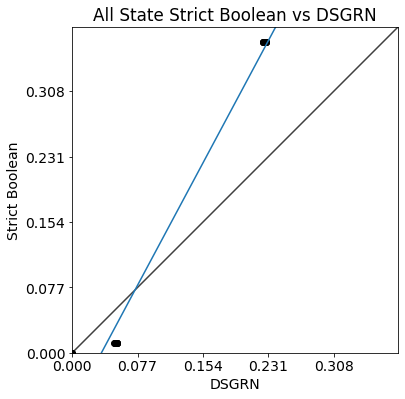

coefficient of determination: 0.9820822573084982
intercept: -0.047190118342648524
slope: [1.91139606]
[0, 0.41757437500000005]


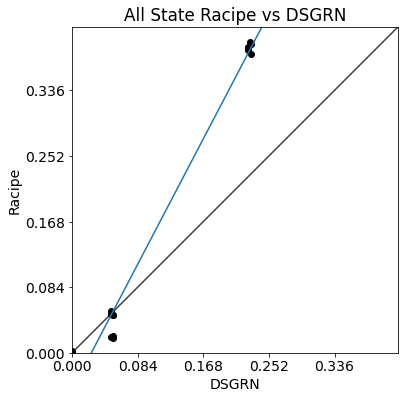

coefficient of determination: 0.9944628932926158
intercept: 0.01957042888264149
slope: [1.0155145]
[0, 0.41757437500000005]


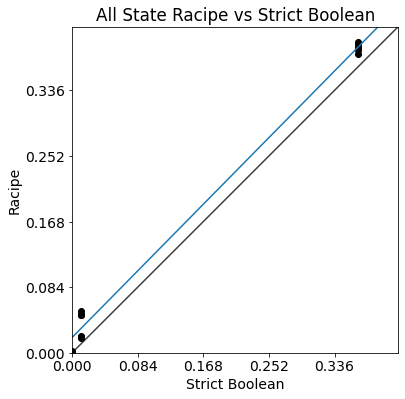

In [30]:
freq_DSGRN = []
freq_SB = []
freq_Racipe = []
labels = []
for fp in all_results:
    freq_DSGRN.append(all_results[fp][0])
    freq_SB.append(all_state_freq[fp])
    freq_Racipe.append(racipe_all_state_freq[fp])

figname = '/home/elizabeth/Desktop/Tetrahedron/figures/Regression_SB_v_DSGRN_all_state.png'
plot_regression_single_fp(freq_DSGRN, freq_SB, 'All State Strict Boolean vs DSGRN', 'DSGRN', 'Strict Boolean', figname, figsize = (8,6))

figname = '/home/elizabeth/Desktop/Tetrahedron/figures/Regression_Racipe_v_DSGRN_all_state.png'
plot_regression_single_fp(freq_DSGRN, freq_Racipe, 'All State Racipe vs DSGRN', 'DSGRN', 'Racipe', figname, figsize = (8,6))

figname = '/home/elizabeth/Desktop/Tetrahedron/figures/Regression_Racipe_v_SB_all_state.png'
plot_regression_single_fp(freq_SB, freq_Racipe, 'All State Racipe vs Strict Boolean', 'Strict Boolean', 'Racipe', figname, figsize = (8,6))

coefficient of determination: 0.9915111406759843
intercept: -0.0029912908653729336
slope: [0.79765794]
[0, 0.051266250000000006]


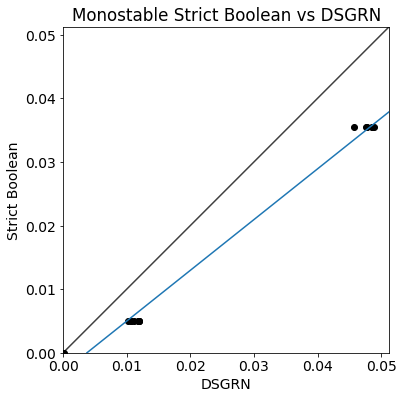

coefficient of determination: 0.9747736366669197
intercept: -0.004154854680067583
slope: [0.6298687]
[0, 0.051266250000000006]


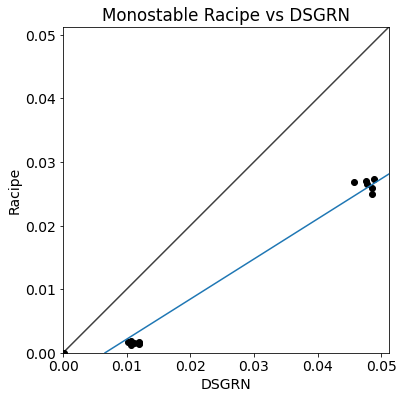

coefficient of determination: 0.9943929600903578
intercept: -0.0018642661107531756
slope: [0.7941623]
[0, 0.037288523090992225]


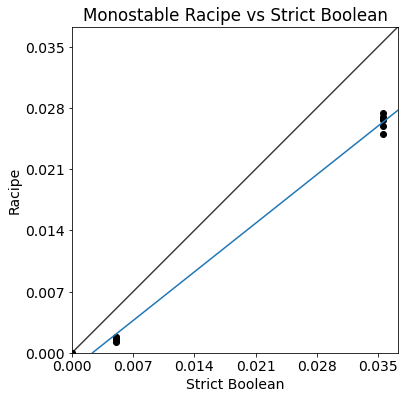

In [31]:
freq_DSGRN = []
freq_SB = []
freq_Racipe = []
labels = []
for fp in all_results:
    freq_DSGRN.append(mono_results[fp][0])
    freq_SB.append(mono_state_freq[fp])
    freq_Racipe.append(racipe_mono_state_freq[fp])

figname = '/home/elizabeth/Desktop/Tetrahedron/figures/Regression_SB_v_DSGRN_mono_state.png'
plot_regression_single_fp(freq_DSGRN, freq_SB, 'Monostable Strict Boolean vs DSGRN', 'DSGRN', 'Strict Boolean', figname, figsize = (8,6))

figname = '/home/elizabeth/Desktop/Tetrahedron/figures/Regression_Racipe_v_DSGRN_mono_state.png'
plot_regression_single_fp(freq_DSGRN, freq_Racipe, 'Monostable Racipe vs DSGRN', 'DSGRN', 'Racipe', figname, figsize = (8,6))

figname = '/home/elizabeth/Desktop/Tetrahedron/figures/Regression_Racipe_v_SB_mono_state.png'
plot_regression_single_fp(freq_SB, freq_Racipe, 'Monostable Racipe vs Strict Boolean', 'Strict Boolean', 'Racipe', figname, figsize = (8,6))

coefficient of determination: 0.8348781614881564
intercept: -0.0018721740526103257
slope: [1.75597123]
[0, 0.02704618198445359]


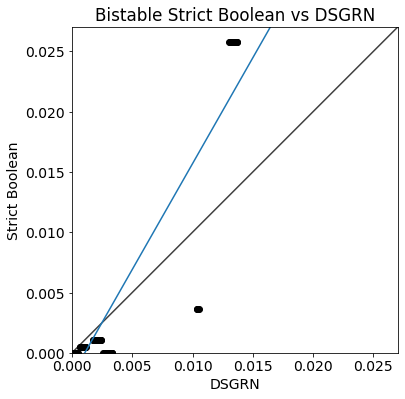

coefficient of determination: 0.8756254063690585
intercept: -0.0013690928455250303
slope: [1.47955673]
[0, 0.025984874999999998]


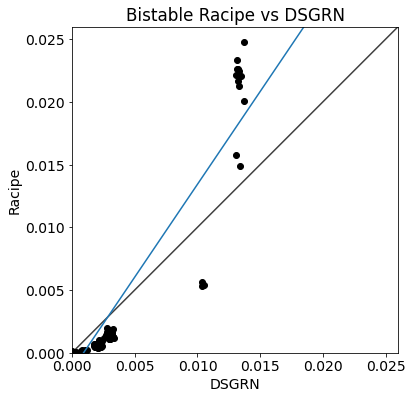

coefficient of determination: 0.9665248349706907
intercept: 0.00030707124406979466
slope: [0.80885953]
[0, 0.02704618198445359]


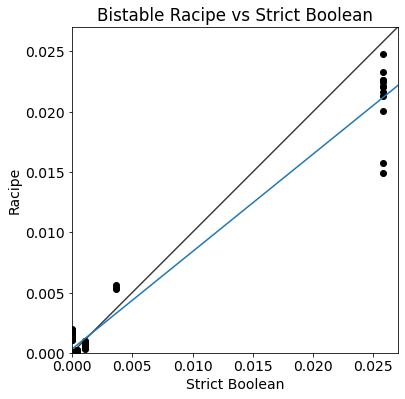

In [33]:
freq_DSGRN = []
freq_SB = []
freq_Racipe = []
labels = []
for fp in bi_results:
    freq_DSGRN.append(bi_results[fp][0])
    freq_SB.append(bi_state_freq[fp])
    if fp in racipe_bi_state_freq:
        freq_Racipe.append(racipe_bi_state_freq[fp])
    elif (fp[1],fp[0]) in racipe_bi_state_freq:
        freq_Racipe.append(racipe_bi_state_freq[(fp[1],fp[0])])
    else:
        freq_Racipe.append(0)

figname = '/home/elizabeth/Desktop/Tetrahedron/figures/Regression_SB_v_DSGRN_bi_state.png'
plot_regression_single_fp(freq_DSGRN, freq_SB, 'Bistable Strict Boolean vs DSGRN', 'DSGRN', 'Strict Boolean', figname, figsize = (8,6))

figname = '/home/elizabeth/Desktop/Tetrahedron/figures/Regression_Racipe_v_DSGRN_bi_state.png'
plot_regression_single_fp(freq_DSGRN, freq_Racipe, 'Bistable Racipe vs DSGRN', 'DSGRN', 'Racipe', figname, figsize = (8,6))

figname = '/home/elizabeth/Desktop/Tetrahedron/figures/Regression_Racipe_v_SB_bi_state.png'
plot_regression_single_fp(freq_SB, freq_Racipe, 'Bistable Racipe vs Strict Boolean', 'Strict Boolean', 'Racipe', figname, figsize = (8,6))

### Strength of Edges

In [34]:
pairs = [('A','B'), ('A', 'C'), ('A', 'D'), ('B', 'C'), ('B', 'D'), ('C', 'D')]

In [35]:
data_sets = [bar_results0_wt, bar_results1_wt, bar_results2_wt, bar_results3_wt]

data_by_fp = {}

for fp in all_states:
    data_by_fp[fp] = {0:{'G':[], 'L':[], 'E':[]}, 1:{'G':[], 'L':[], 'E':[]}, 2:{'G':[], 'L':[], 'E':[]}, 3:{'G':[], 'L':[], 'E':[]}}
    fp_string = 'FP { ' + str(fp[0]) + ', ' + str(fp[1]) + ', ' + str(fp[2]) + ', ' + str(fp[3]) + ' }'

    for s in range(len(data_sets)):
        data_set = data_sets[s]
        data_labels = []
        for pair in pairs:
            node1 = pair[0] + ' :'
            t1 = 'T['+pair[0]+'->'+pair[1]+']'
            node2 = pair[1] + ' :'
            t2 = 'T['+pair[1]+'->'+pair[0]+']'

            data_labels.append(pair[0]+pair[1])
            data_labels.append(pair[0]+pair[1]+'e')
            data_labels.append(pair[1]+pair[0])

            ineq = get_inequalities_for_FPs_DSGRN(data_set,[fp_string],network,net_name)
            if ineq != []:
                node1_greater = 0
                node2_greater = 0
                equal = 0
                for i in ineq:
                # print(i[i.find(node1):i.find(t1)])
                    u1 = i[i.find(node1):i.find(t1)].count('p')
                    #print(i[i.find(node2):i.find(t2)])
                    u2 = i[i.find(node2):i.find(t2)].count('p')
                    if u1 > u2:
                        node1_greater += 1
                    if u1 == u2:
                        equal += 1
                    if u1 < u2:
                        node2_greater += 1
                #print(pair, fp, node1_greater, equal, node2_greater, len(ineq))
                data_by_fp[fp][s]['G'].append(node1_greater)
                data_by_fp[fp][s]['L'].append(node2_greater)
                data_by_fp[fp][s]['E'].append(equal)
                
avg_data = {}
for fp in data_by_fp:
    avg_data[fp] = {'G':[], 'E':[], 'L':[], 'errG':[], 'errE':[], 'errL':[]}
    for group in ['G', 'E', 'L']:
        for index in range(6):
            lst = [data_by_fp[fp][i][group][index] for i in range(4) if data_by_fp[fp][i][group] != []]
            if len(lst) > 1:
                avg = sum(lst)/4
                sd = stat.stdev(lst)
                avg_data[fp][group].append(avg)
                avg_data[fp]['err'+group].append(sd)

In [37]:
print('FP & I stronger J & Average & sd. dev. & J stronger I & Average & sd. dev. &  I Equal J & Average & sd. dev.')
for fp in avg_data:
    fp_label = f'{int(fp[0]/3)}{int(fp[1]/3)}{int(fp[2]/3)}{int(fp[3]/3)}'
    for pair in pairs: 
        if avg_data[fp]['G'] != []:
            print(fp, ' & ', pair[0]+pair[1], ' & ', avg_data[fp]['G'][pairs.index(pair)], ' & ', avg_data[fp]['errG'][pairs.index(pair)], ' & ', pair[1]+pair[0], ' & ', avg_data[fp]['L'][pairs.index(pair)], ' & ', avg_data[fp]['errL'][pairs.index(pair)], ' &  E & ', avg_data[fp]['E'][pairs.index(pair)], ' & ', avg_data[fp]['errE'][pairs.index(pair)])

FP & I stronger J & Average & sd. dev. & J stronger I & Average & sd. dev. &  I Equal J & Average & sd. dev.
(0, 3, 0, 3)  &  AB  &  324.5  &  13.723459233492601  &  BA  &  69.75  &  10.935416468216166  &  E &  59.75  &  8.460693430998036
(0, 3, 0, 3)  &  AC  &  190.75  &  8.88350531415762  &  CA  &  198.0  &  15.769168230019828  &  E &  65.25  &  6.701989754294367
(0, 3, 0, 3)  &  AD  &  326.5  &  6.855654600401044  &  DA  &  71.25  &  1.8929694486000912  &  E &  56.25  &  11.5
(0, 3, 0, 3)  &  BC  &  74.25  &  4.7871355387816905  &  CB  &  317.75  &  11.615363389350618  &  E &  62.0  &  5.354126134736337
(0, 3, 0, 3)  &  BD  &  198.0  &  12.083045973594572  &  DB  &  198.75  &  11.672617529928752  &  E &  57.25  &  5.251983752196243
(0, 3, 0, 3)  &  CD  &  334.5  &  14.153915830374764  &  DC  &  65.75  &  4.112987559751022  &  E &  53.75  &  3.095695936834452
(0, 0, 3, 3)  &  AB  &  200.25  &  7.544313531837517  &  BA  &  203.25  &  15.195942440884233  &  E &  62.75  &  6.44851404071

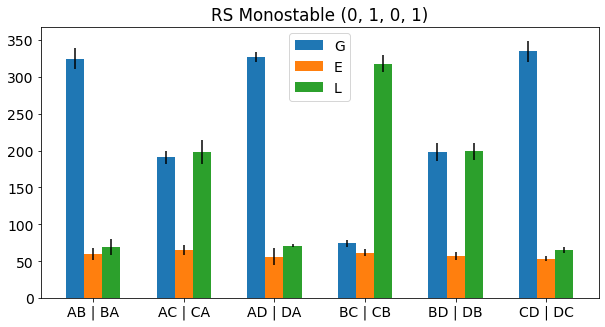

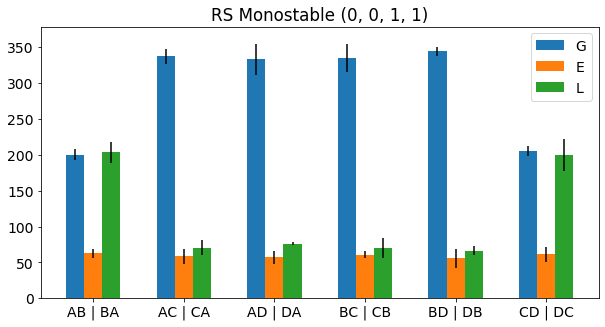

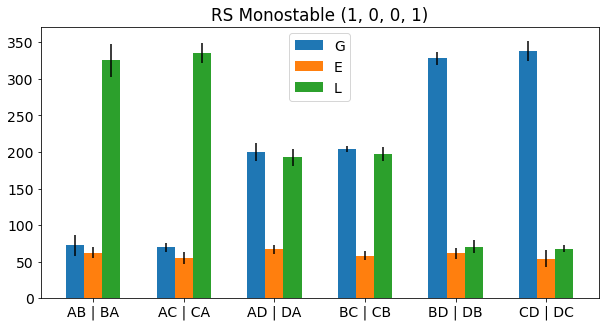

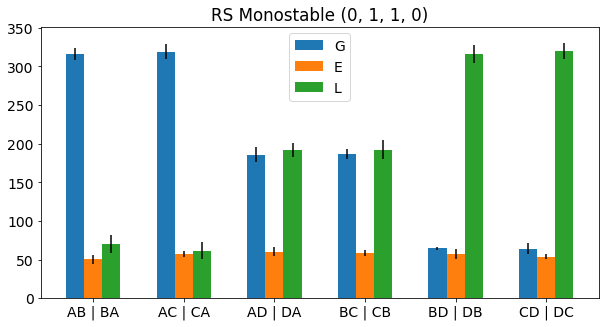

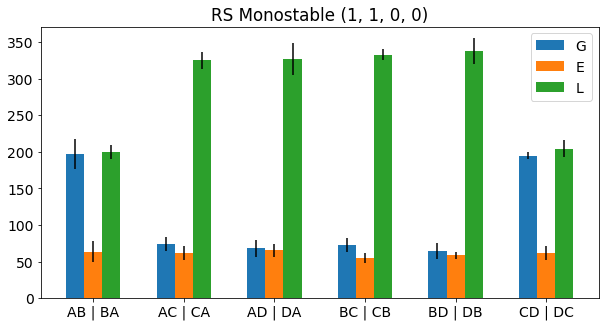

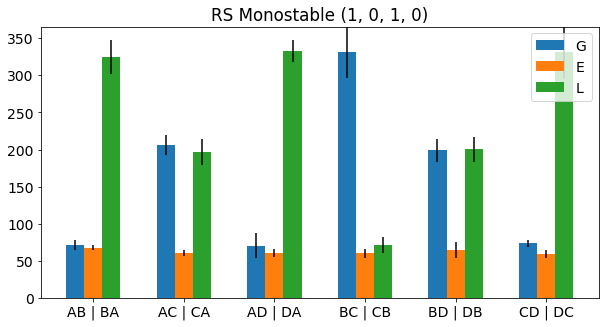

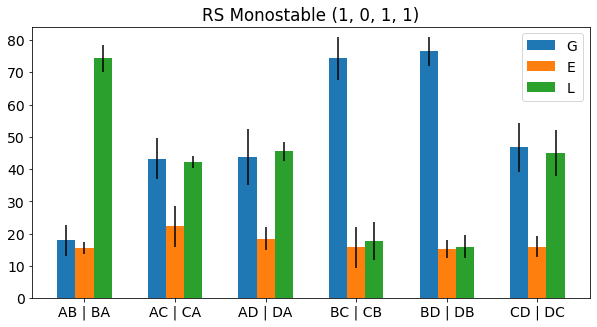

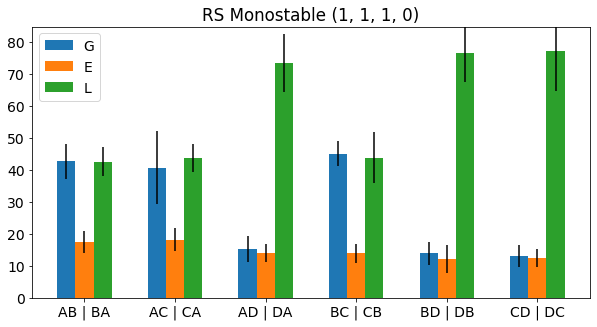

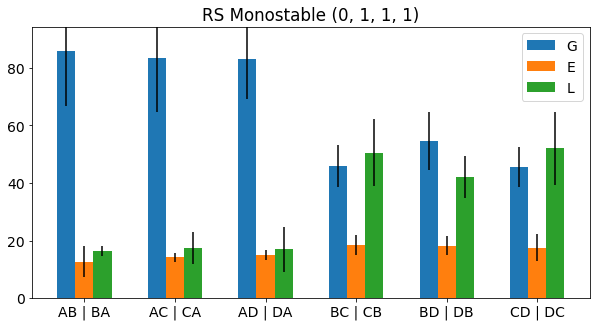

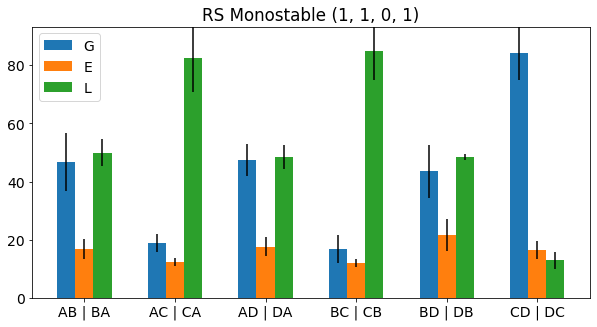

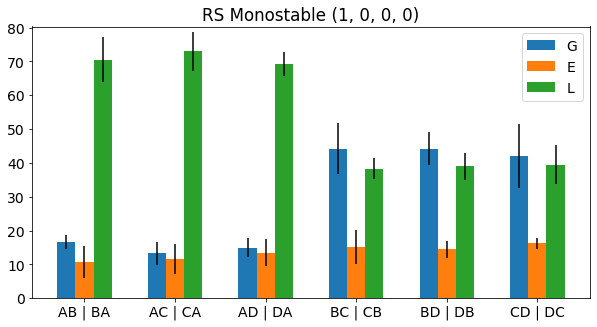

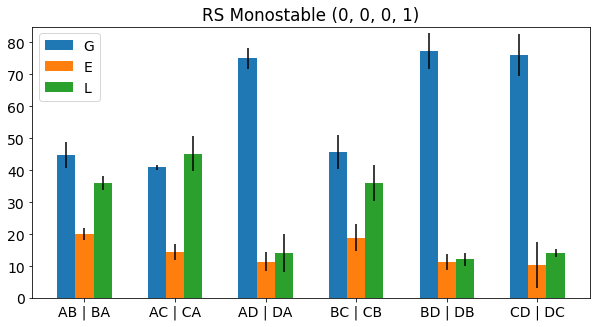

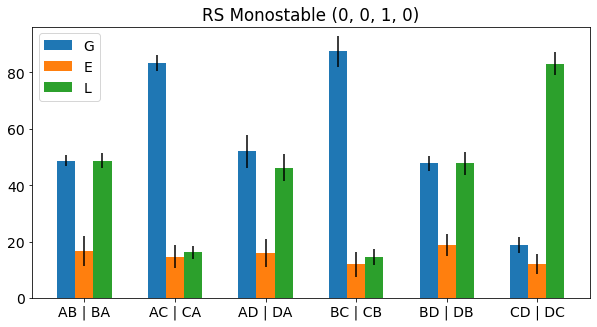

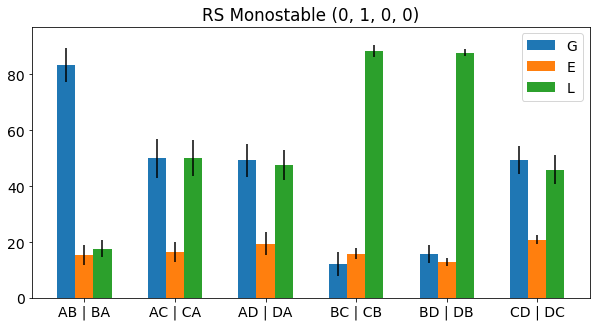

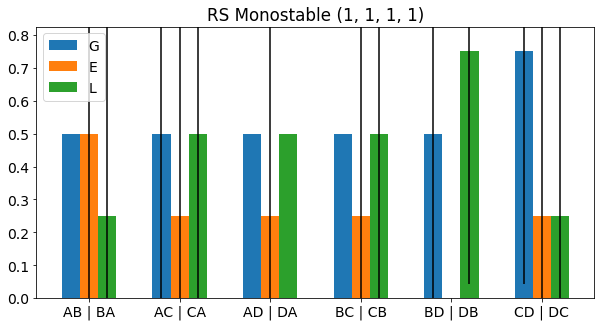

In [23]:
for fp in avg_data:
   if (avg_data[fp]['G'], avg_data[fp]['E'], avg_data[fp]['L']) != ([], [], []):
      data = {
         'G': avg_data[fp]['G'],
         'E': avg_data[fp]['E'],
         'L': avg_data[fp]['L'],
      }

      labels = ['AB | BA', 'AC | CA', 'AD | DA', 'BC | CB', 'BD | DB', 'CD | DC']
      bar_width = 0.2
      x_pos = np.arange(len(labels))
      fig, ax = plt.subplots(figsize=(10,5))

      # Loop through each group of bars and create a set of bars for each group
      for i, (group, values) in enumerate(data.items()):
         # Calculate the x-axis position for the current group of bars
         pos = x_pos + (i * bar_width)
         # Create a set of bars for the current group
         rects = ax.bar(pos, values, width=bar_width, label=group, yerr = avg_data[fp]['err'+group])
         #ax.bar_label(rects, padding=3)

      # Set the x-axis labels and tick positions
      ax.set_xticks(x_pos + ((len(data) - 1) / 2) * bar_width)
      ax.set_xticklabels(labels)

      ax.legend()

      ax.set_title('RS Monostable ' + str(tuple([int(i/3) for i in fp])))
      m =  max(max(avg_data[fp]['G']), max(avg_data[fp]['L']), max(avg_data[fp]['E']))
      ax.set_ylim(0,m+.1*m)
      # Show the plot
      figname = '/home/elizabeth/Desktop/Tetrahedron/figures/RS_Monostable_'+str(fp)+'.png'
      plt.savefig(figname)
      plt.show()

In [38]:
data_sets = [bar_results0_wt, bar_results1_wt, bar_results2_wt, bar_results3_wt]

data_by_fp = {}

Done = []
for fp1 in all_states:
    for fp2 in all_states:
        if fp1 != fp2:
            if (fp1, fp2) not in Done:
                Done.append((fp1, fp2))
                Done.append((fp2, fp1))
                data_by_fp[(fp1,fp2)] = {0:{'G':[], 'L':[], 'E':[]}, 1:{'G':[], 'L':[], 'E':[]}, 2:{'G':[], 'L':[], 'E':[]}, 3:{'G':[], 'L':[], 'E':[]}}
                fp1_string = 'FP { ' + str(fp1[0]) + ', ' + str(fp1[1]) + ', ' + str(fp1[2]) + ', ' + str(fp1[3]) + ' }'
                fp2_string = 'FP { ' + str(fp2[0]) + ', ' + str(fp2[1]) + ', ' + str(fp2[2]) + ', ' + str(fp2[3]) + ' }'

                for s in range(len(data_sets)):
                    data_set = data_sets[s]
                    data_labels = []
                    for pair in pairs:
                        node1 = pair[0] + ' :'
                        t1 = 'T['+pair[0]+'->'+pair[1]+']'
                        node2 = pair[1] + ' :'
                        t2 = 'T['+pair[1]+'->'+pair[0]+']'

                        data_labels.append(pair[0]+pair[1])
                        data_labels.append(pair[0]+pair[1]+'e')
                        data_labels.append(pair[1]+pair[0])

                        ineq = get_inequalities_for_FPs_DSGRN(data_set,[fp1_string, fp2_string],network,net_name)
                        if ineq != []:

                            node1_greater = 0
                            node2_greater = 0
                            equal = 0
                            for i in ineq:
                            # print(i[i.find(node1):i.find(t1)])
                                u1 = i[i.find(node1):i.find(t1)].count('p')
                                #print(i[i.find(node2):i.find(t2)])
                                u2 = i[i.find(node2):i.find(t2)].count('p')
                                if u1 > u2:
                                    node1_greater += 1
                                if u1 == u2:
                                    equal += 1
                                if u1 < u2:
                                    node2_greater += 1
                            #print(pair, fp, node1_greater, equal, node2_greater, len(ineq))
                            data_by_fp[(fp1, fp2)][s]['G'].append(node1_greater)
                            data_by_fp[(fp1, fp2)][s]['L'].append(node2_greater)
                            data_by_fp[(fp1, fp2)][s]['E'].append(equal)
avg_data = {}
for fp in data_by_fp:
    avg_data[fp] = {'G':[], 'E':[], 'L':[], 'errG':[], 'errE':[], 'errL':[]}
    for group in ['G', 'E', 'L']:
        for index in range(6):
            lst = [data_by_fp[fp][i][group][index] for i in range(4) if data_by_fp[fp][i][group] != []]
            if len(lst) > 1:
                avg = sum(lst)/4
                sd = stat.stdev(lst)
                avg_data[fp][group].append(avg)
                avg_data[fp]['err'+group].append(sd)


In [40]:
print('FP & FP lable & I stronger J & Average & sd. dev. & J stronger I & Average & sd. dev. &  I Equal J & Average & sd. dev.')
for fp in avg_data:
    fp_label = f'{int(fp[0][0]/3)}{int(fp[0][1]/3)}{int(fp[0][2]/3)}{int(fp[0][3]/3)} {int(fp[1][0]/3)}{int(fp[1][1]/3)}{int(fp[1][2]/3)}{int(fp[1][3]/3)} '
    for pair in pairs: 
        if avg_data[fp]['G'] != []:
            print(fp, ' & ', fp_label, ' & ', pair[0]+pair[1], ' & ', avg_data[fp]['G'][pairs.index(pair)], ' & ', avg_data[fp]['errG'][pairs.index(pair)], ' & ', pair[1]+pair[0], ' & ', avg_data[fp]['L'][pairs.index(pair)], ' & ', avg_data[fp]['errL'][pairs.index(pair)], ' &  E & ', avg_data[fp]['E'][pairs.index(pair)], ' & ', avg_data[fp]['errE'][pairs.index(pair)])

FP & FP lable & I stronger J & Average & sd. dev. & J stronger I & Average & sd. dev. &  I Equal J & Average & sd. dev.
((0, 3, 0, 3), (0, 0, 3, 3))  &  0101 0011   &  AB  &  84.25  &  5.909032633745278  &  BA  &  30.5  &  5.196152422706632  &  E &  21.0  &  3.8297084310253524
((0, 3, 0, 3), (0, 0, 3, 3))  &  0101 0011   &  AC  &  87.25  &  12.284814474246922  &  CA  &  32.25  &  4.112987559751022  &  E &  16.25  &  2.753785273643051
((0, 3, 0, 3), (0, 0, 3, 3))  &  0101 0011   &  AD  &  106.75  &  7.41057802513857  &  DA  &  12.75  &  2.362907813126304  &  E &  16.25  &  4.645786621588784
((0, 3, 0, 3), (0, 0, 3, 3))  &  0101 0011   &  BC  &  55.75  &  7.135591542869215  &  CB  &  54.75  &  5.439056290693573  &  E &  25.25  &  4.031128874149275
((0, 3, 0, 3), (0, 0, 3, 3))  &  0101 0011   &  BD  &  85.75  &  6.13052471924984  &  DB  &  30.75  &  3.774917217635375  &  E &  19.25  &  3.304037933599835
((0, 3, 0, 3), (0, 0, 3, 3))  &  0101 0011   &  CD  &  83.5  &  9.983319421247959  &  

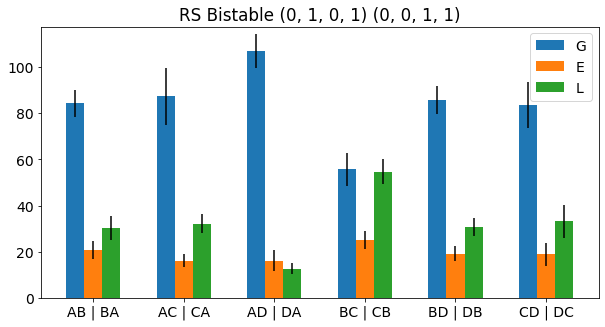

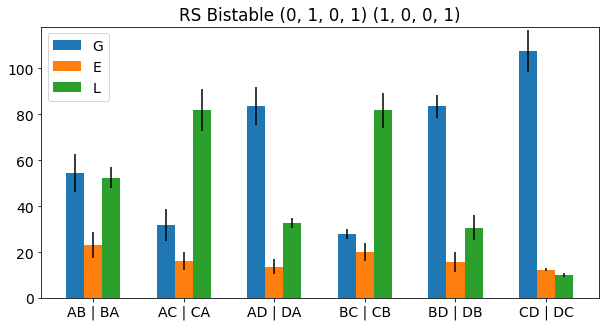

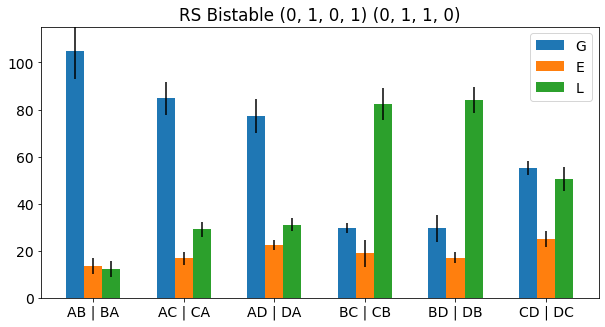

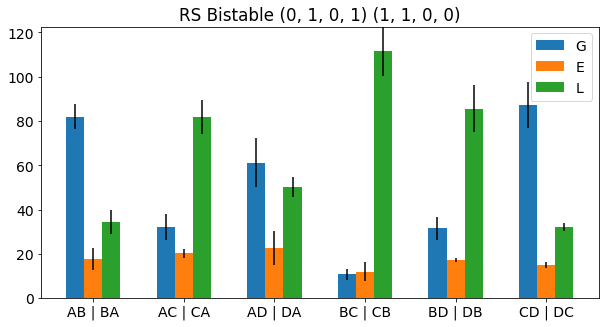

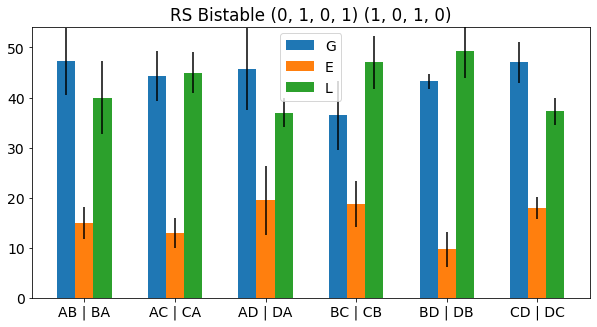

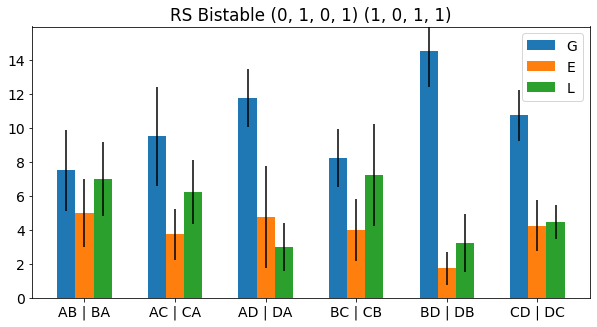

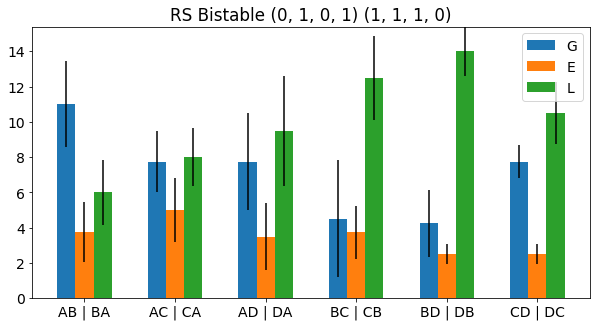

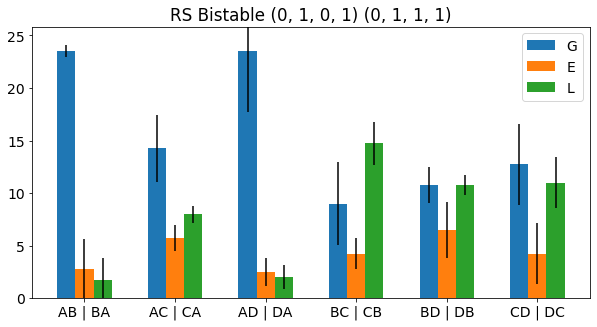

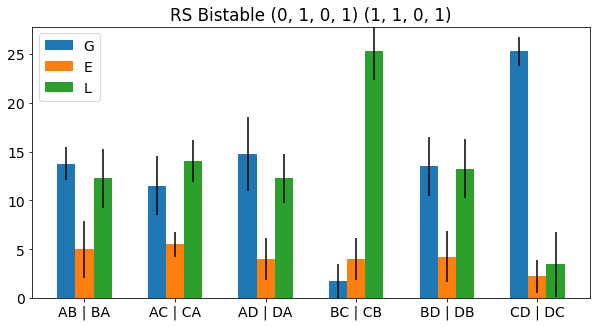

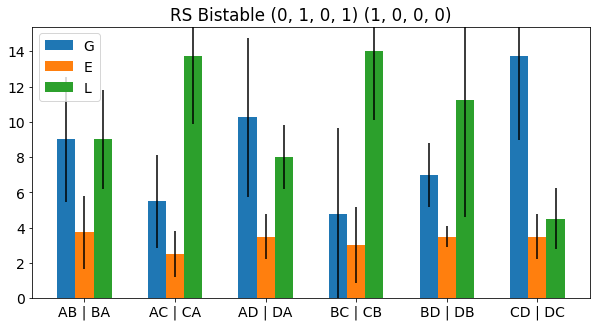

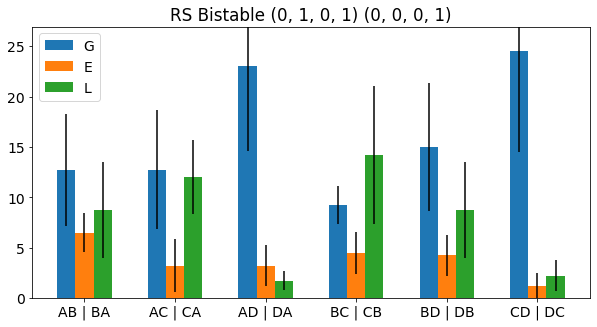

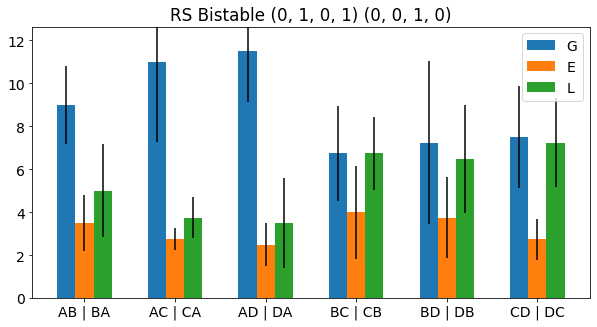

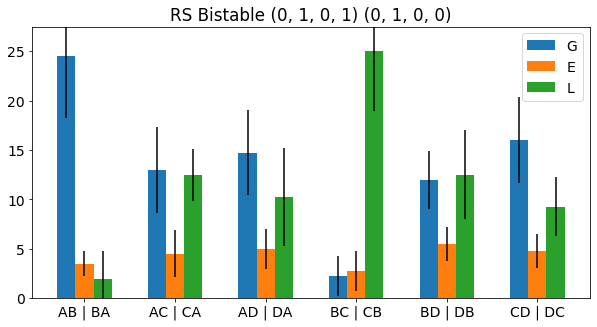

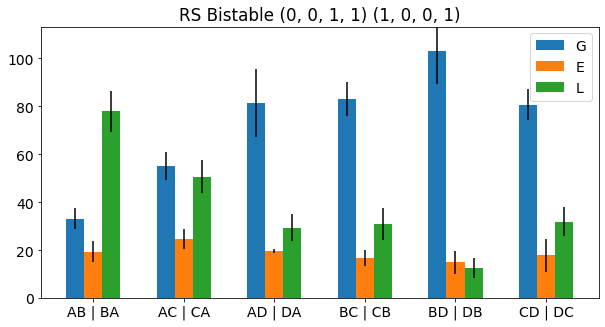

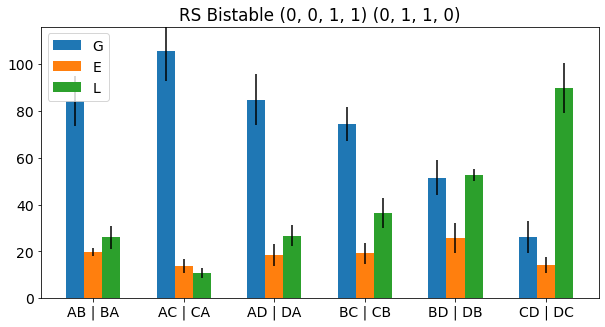

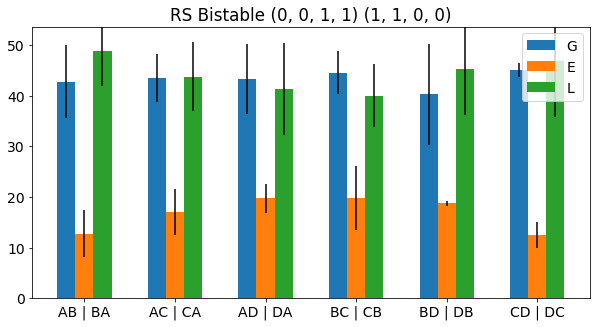

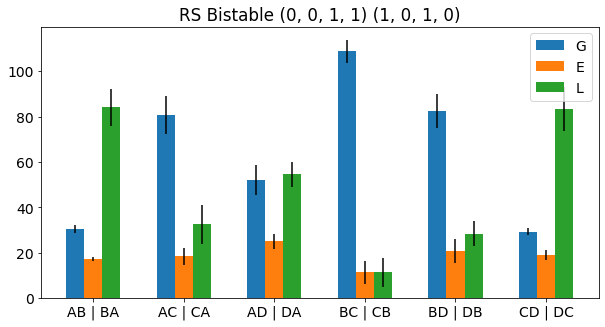

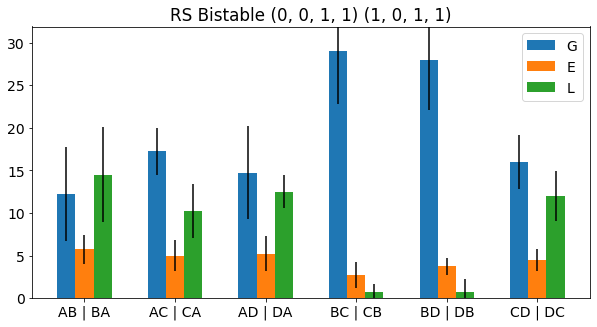

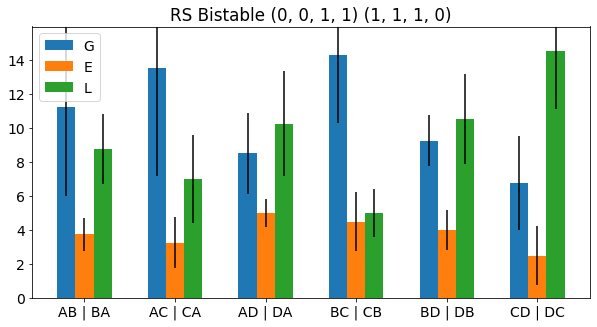

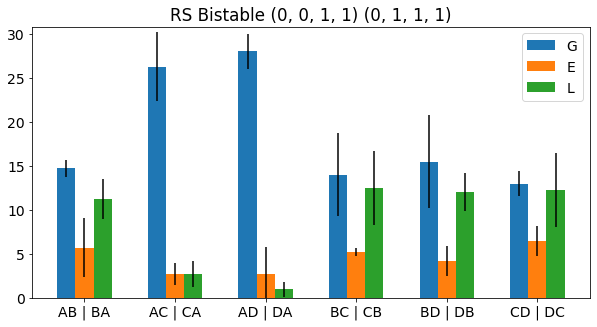

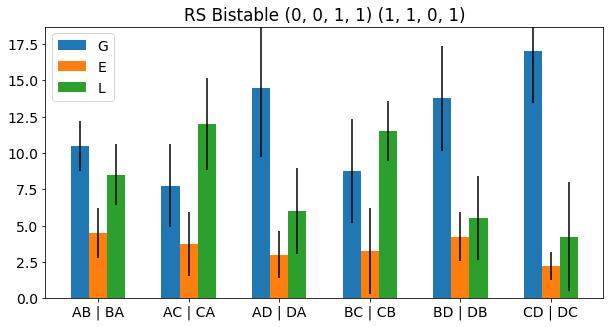

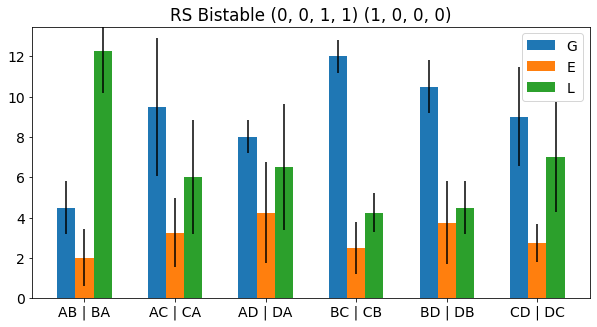

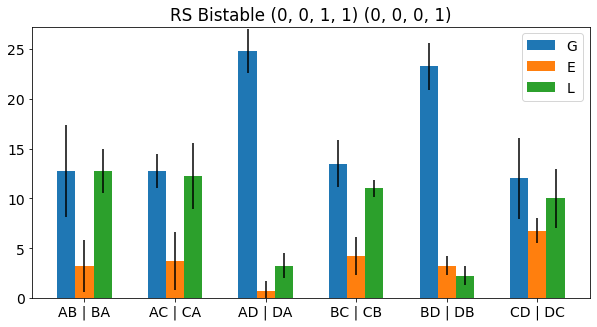

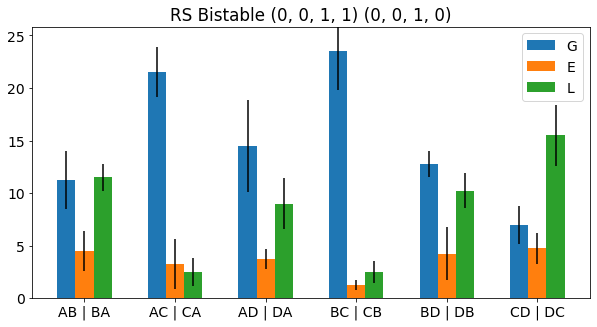

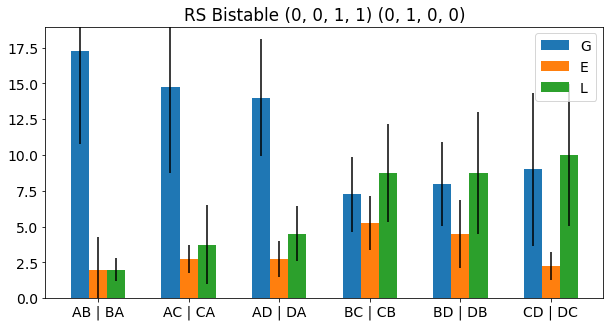

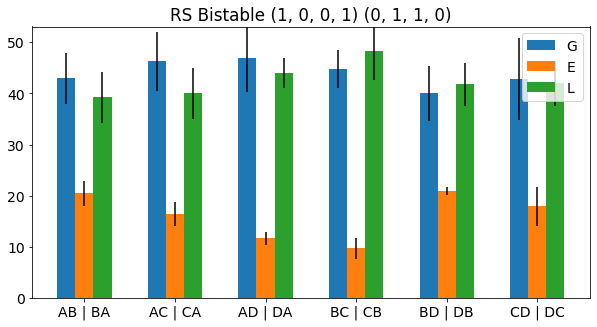

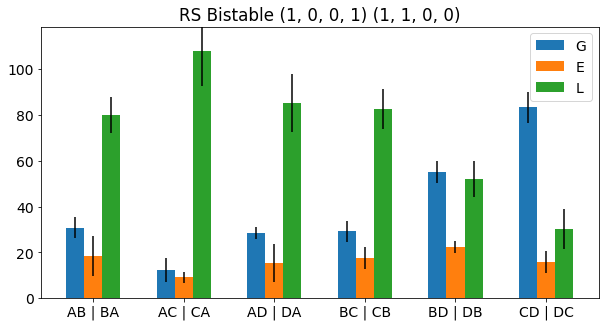

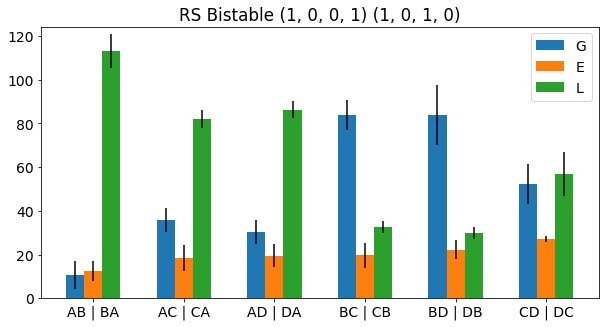

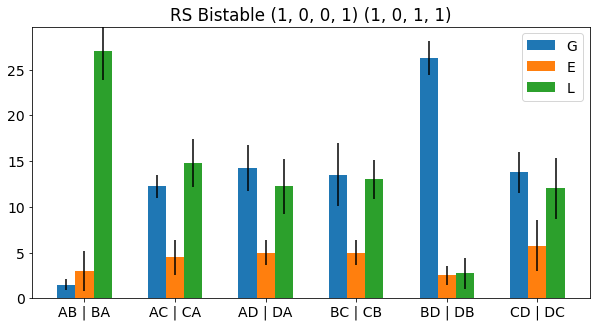

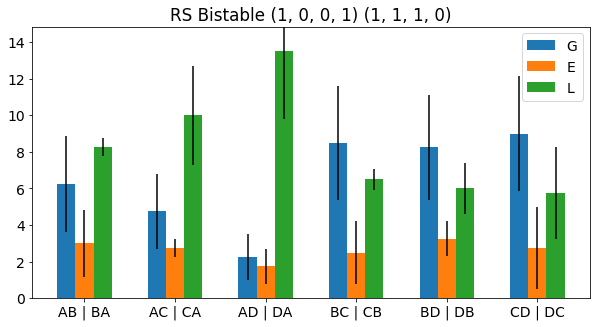

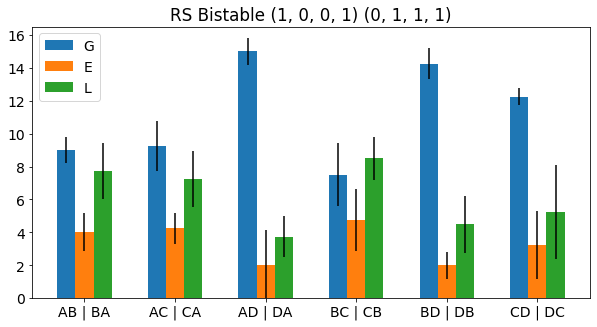

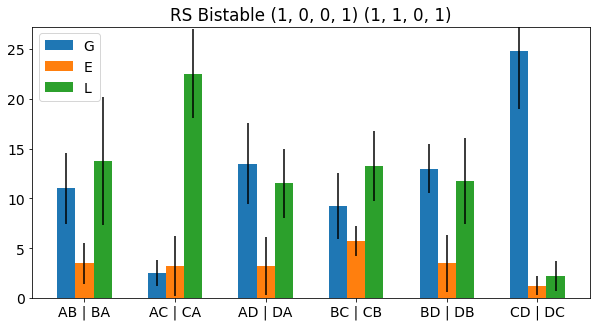

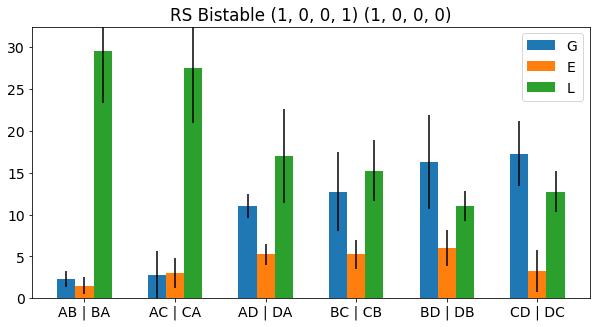

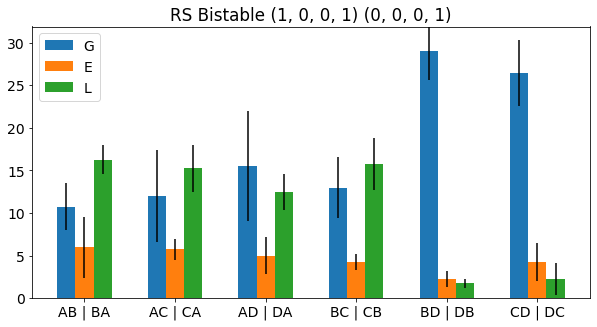

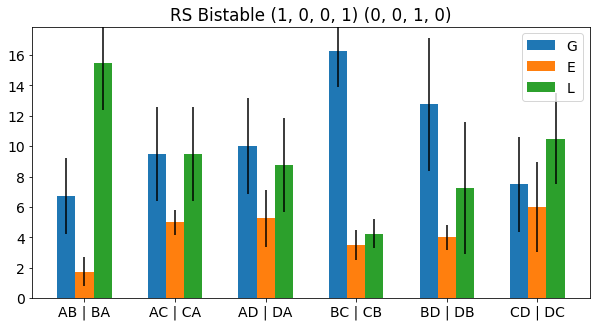

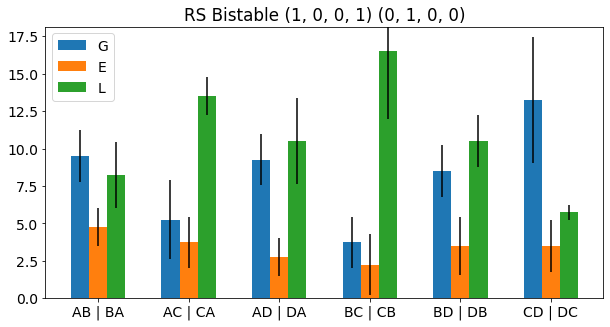

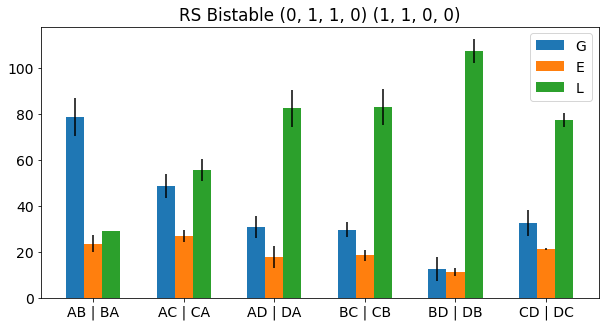

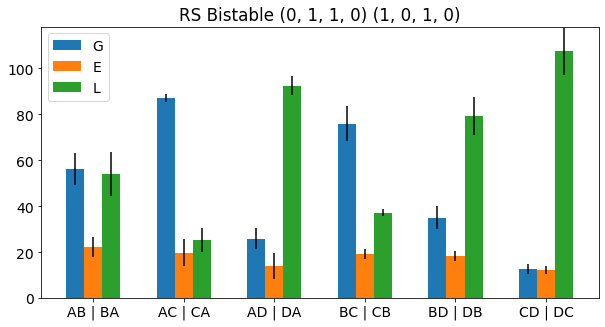

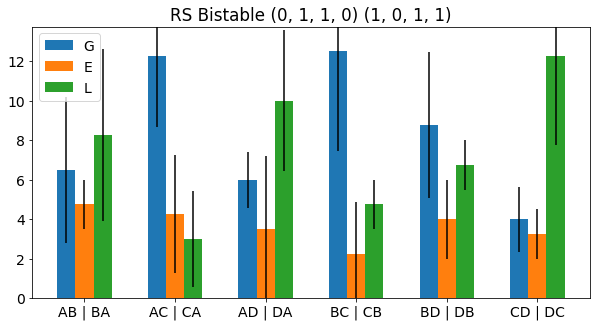

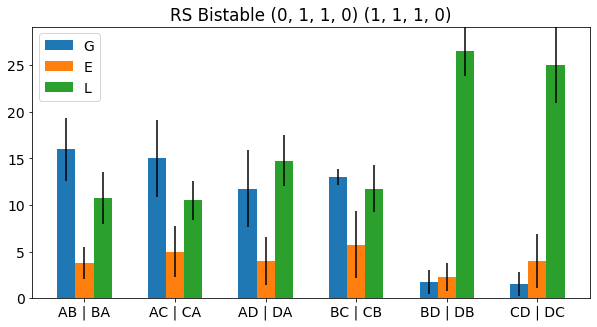

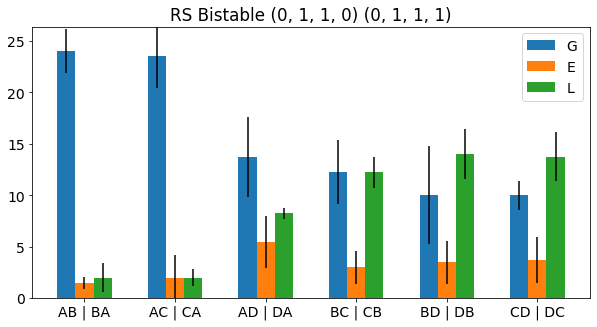

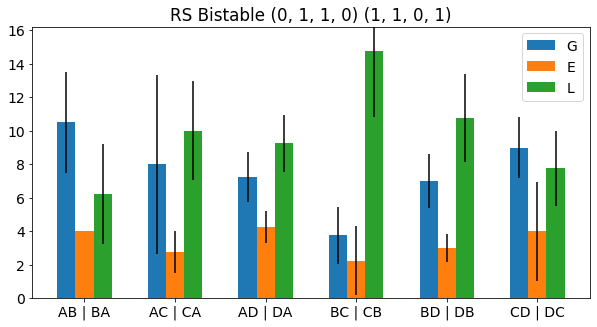

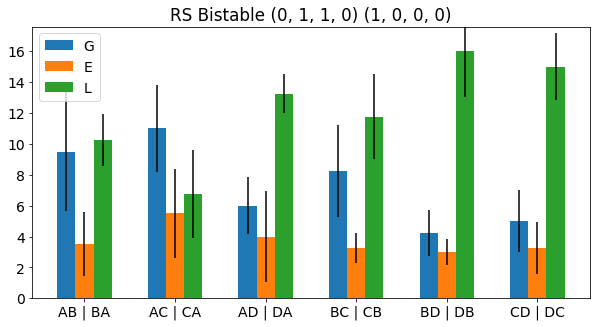

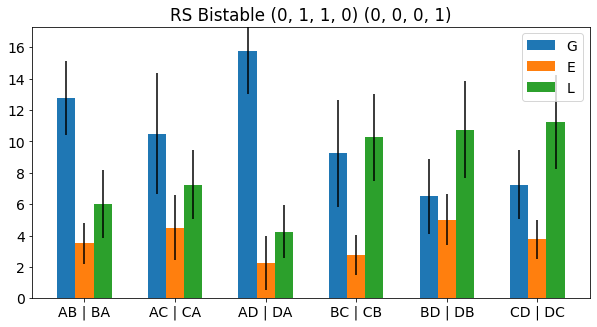

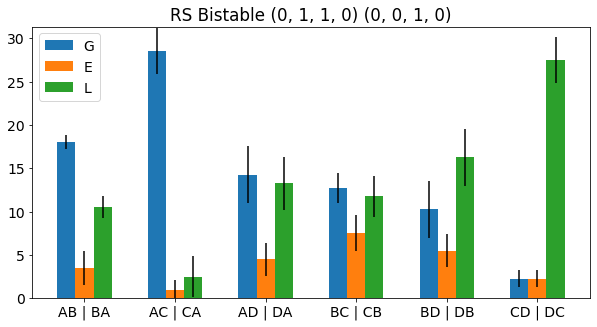

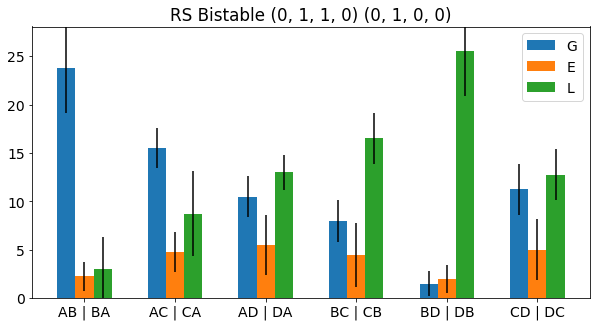

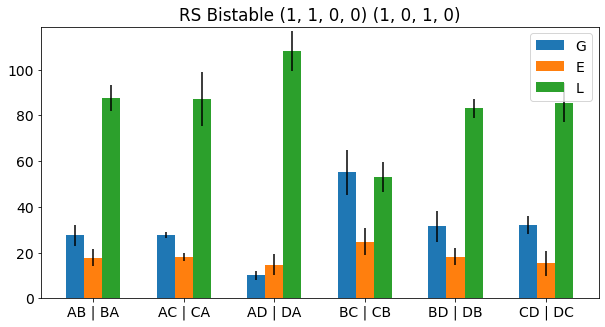

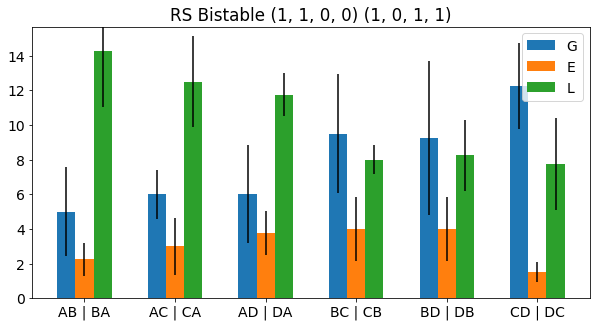

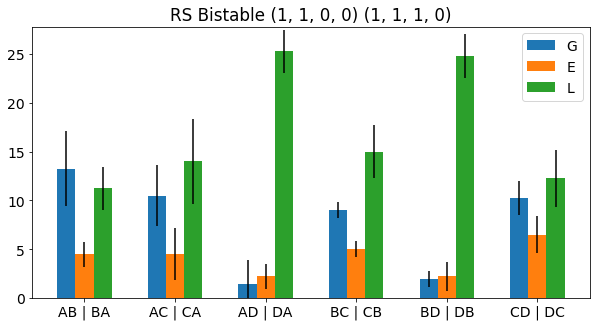

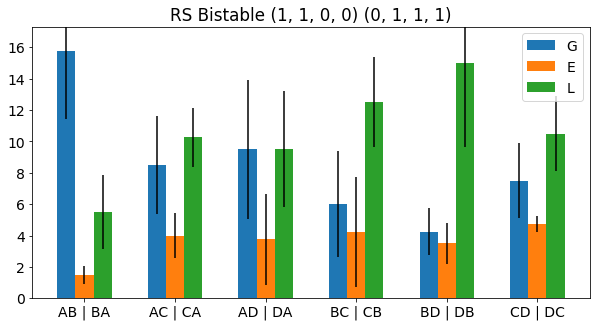

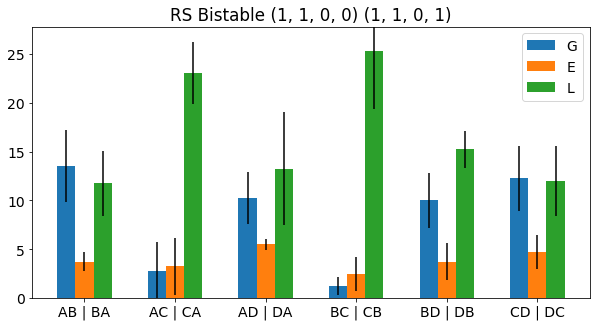

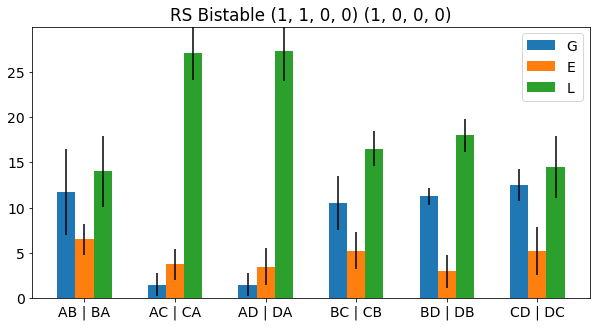

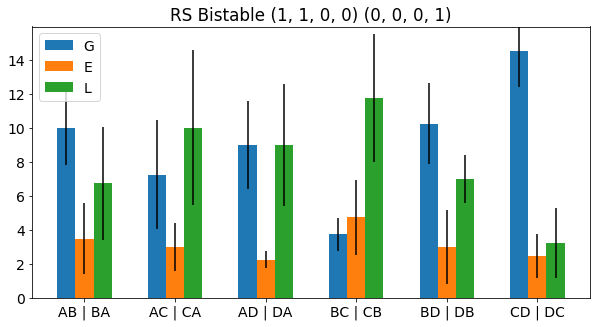

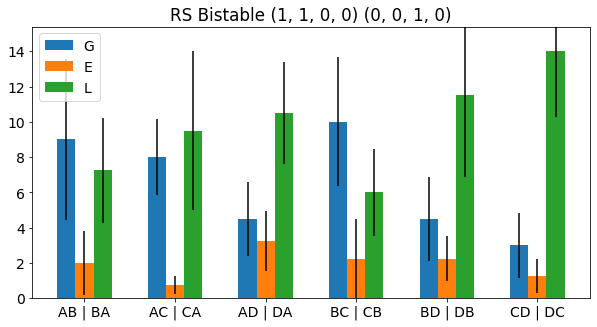

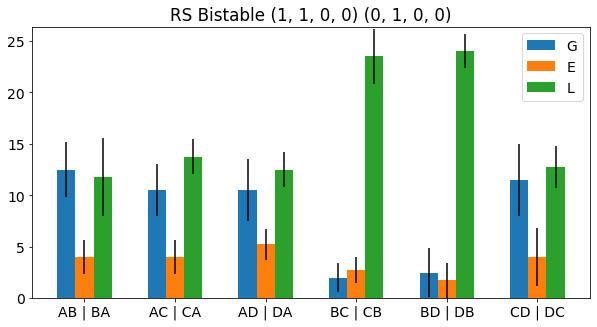

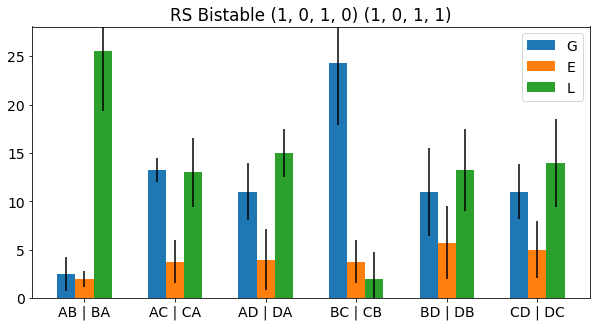

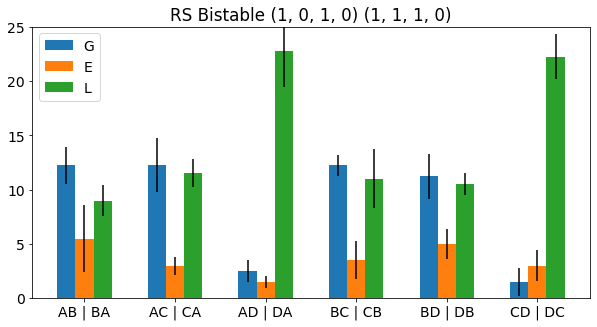

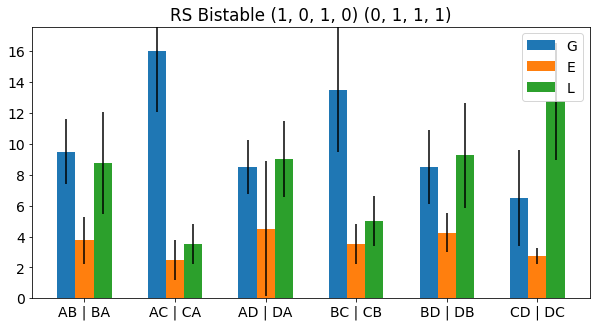

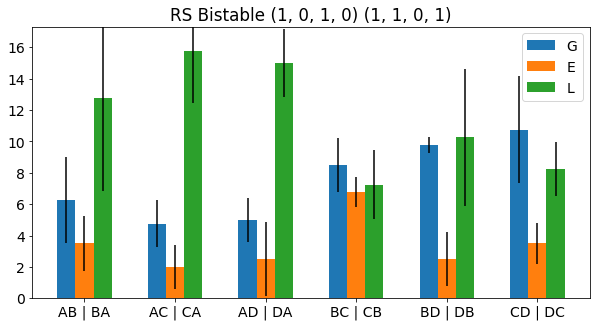

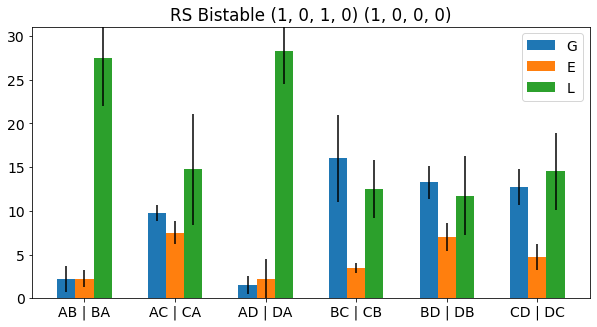

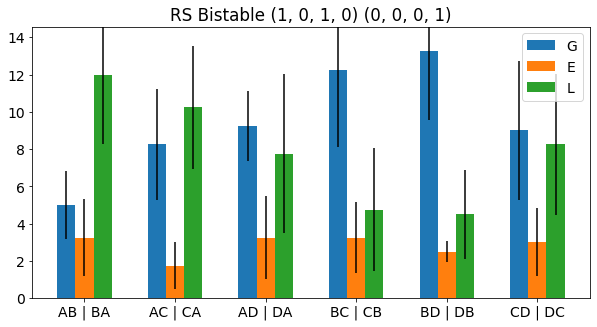

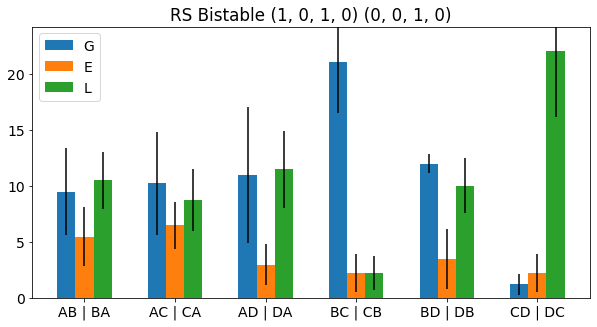

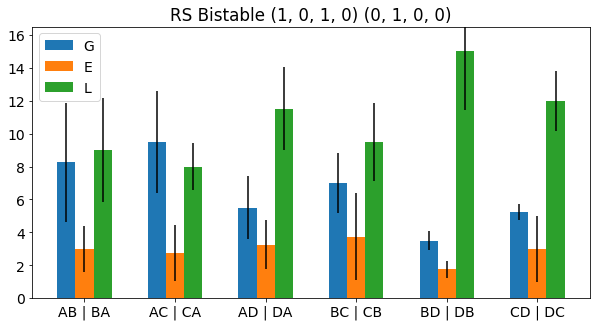

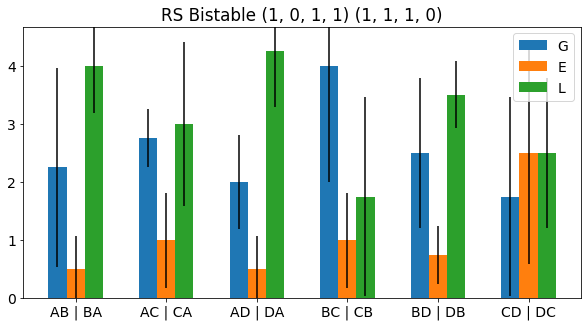

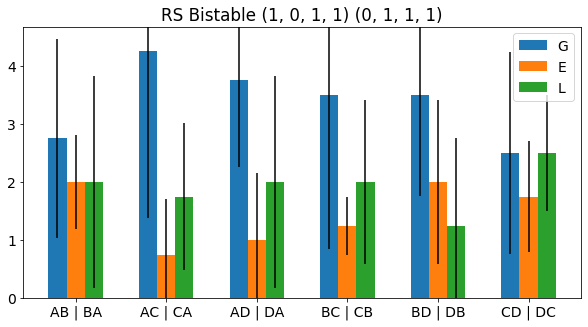

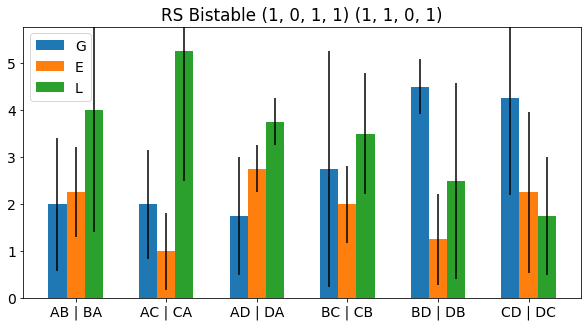

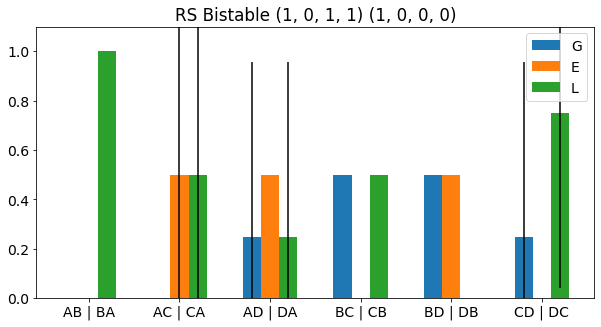

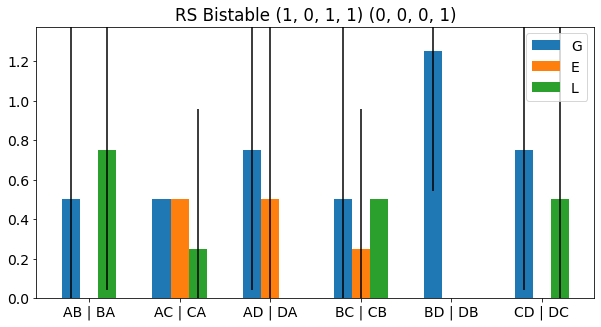

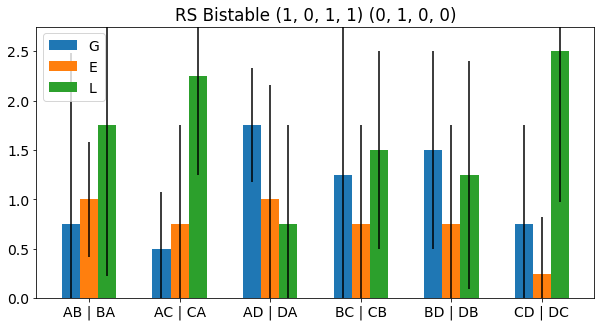

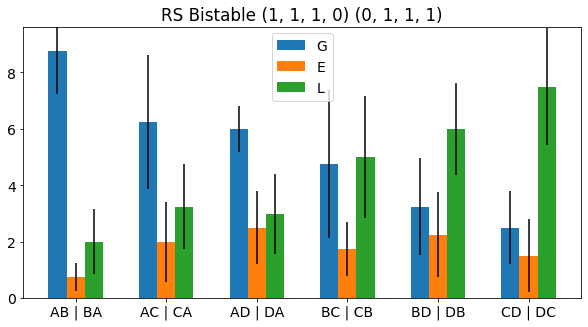

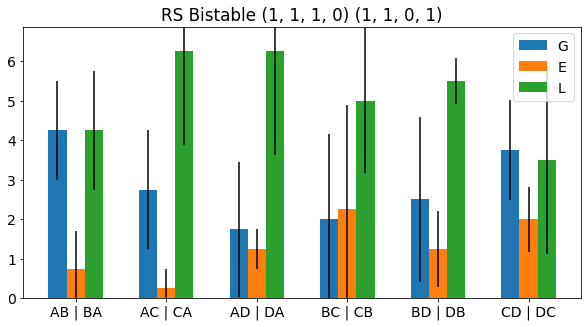

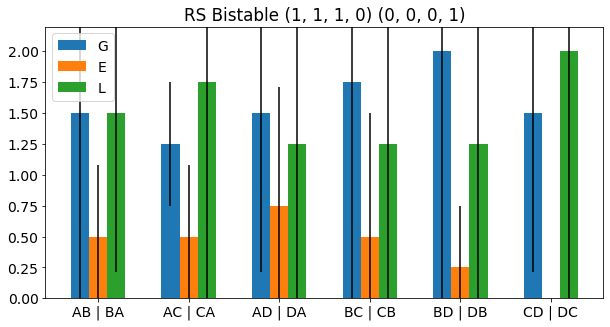

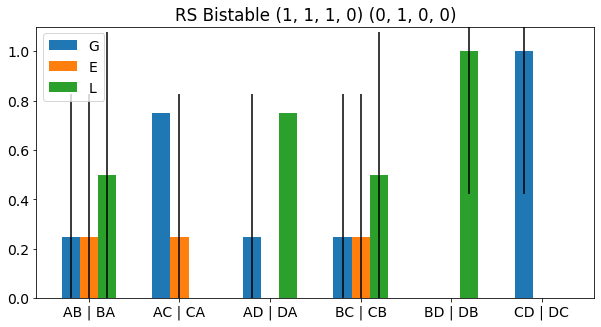

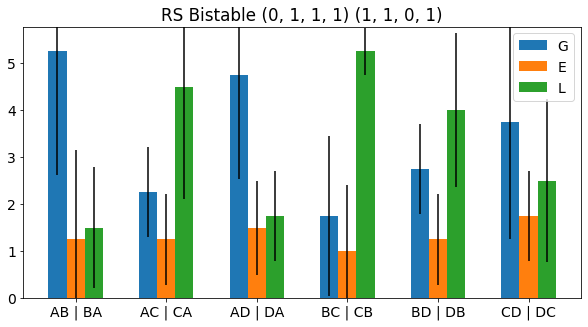

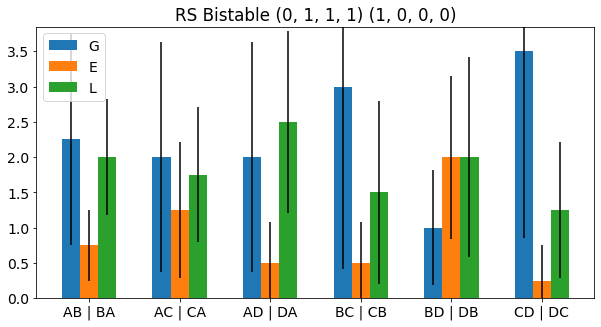

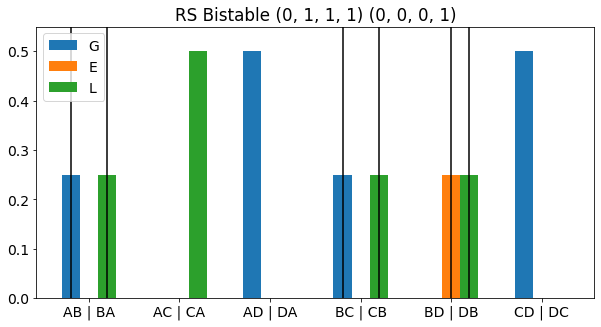

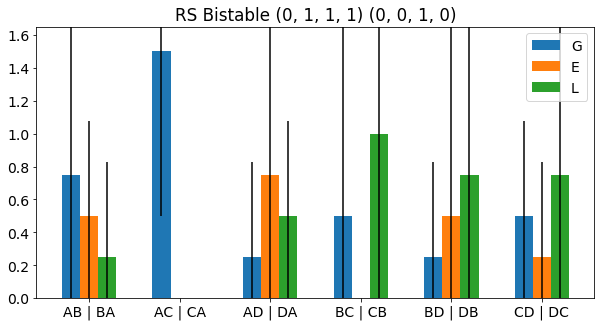

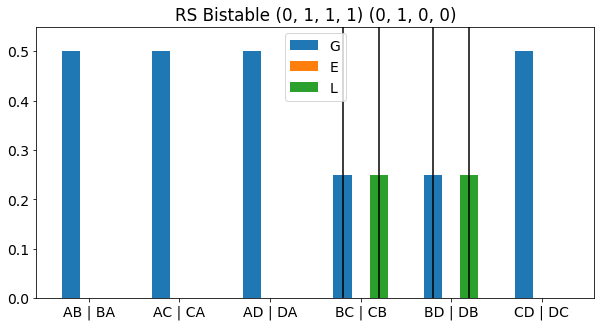

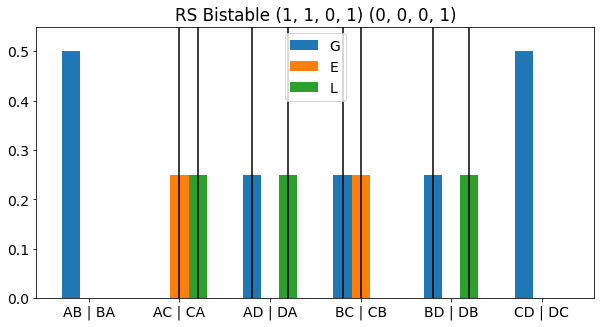

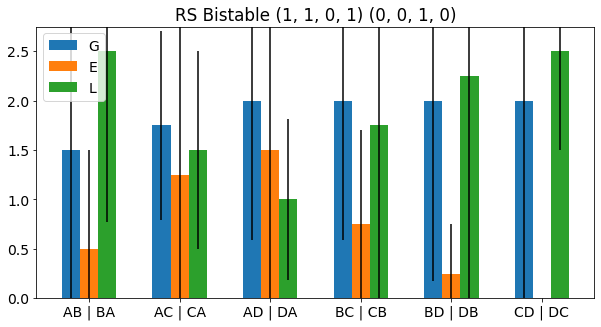

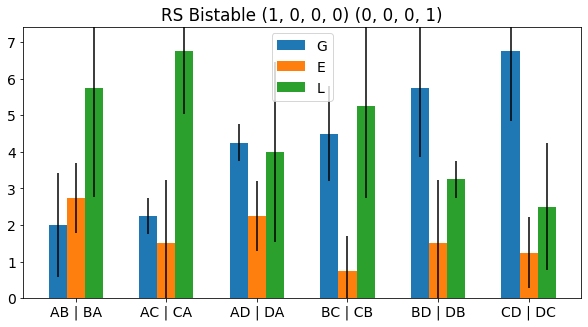

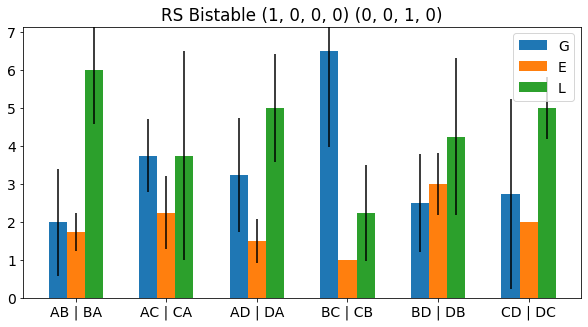

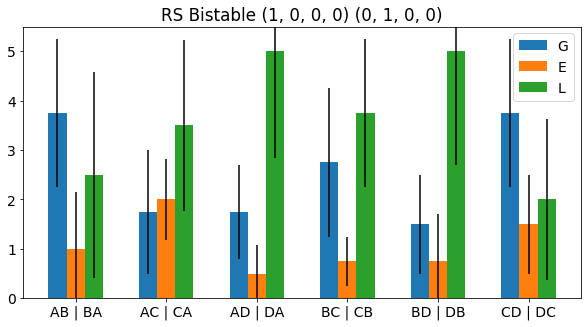

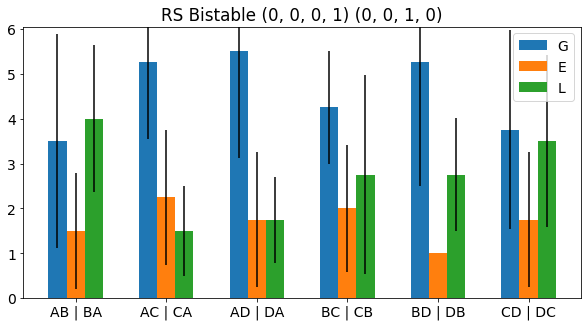

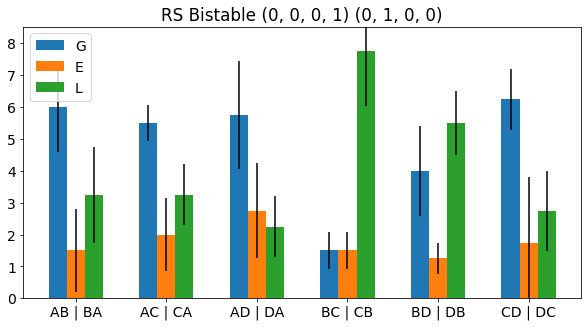

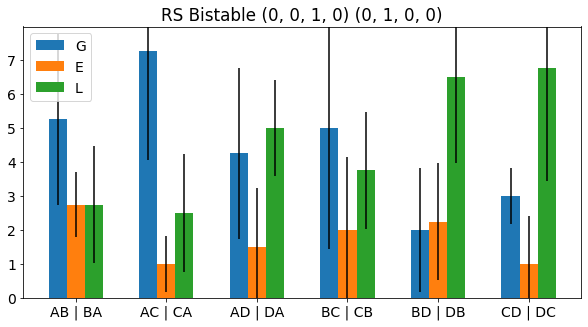

In [41]:
for fp in avg_data:
   if (avg_data[fp]['G'], avg_data[fp]['E'], avg_data[fp]['L']) != ([], [], []):
      data = {
         'G': avg_data[fp]['G'],
         'E': avg_data[fp]['E'],
         'L': avg_data[fp]['L'],
      }

      labels = ['AB | BA', 'AC | CA', 'AD | DA', 'BC | CB', 'BD | DB', 'CD | DC']
      bar_width = 0.2
      x_pos = np.arange(len(labels))
      fig, ax = plt.subplots(figsize=(10,5))

      # Loop through each group of bars and create a set of bars for each group
      for i, (group, values) in enumerate(data.items()):
         # Calculate the x-axis position for the current group of bars
         pos = x_pos + (i * bar_width)
         # Create a set of bars for the current group
         rects = ax.bar(pos, values, width=bar_width, label=group, yerr = avg_data[fp]['err'+group])
         #ax.bar_label(rects, padding=3)

      # Set the x-axis labels and tick positions
      ax.set_xticks(x_pos + ((len(data) - 1) / 2) * bar_width)
      ax.set_xticklabels(labels)

      ax.legend()

      ax.set_title('RS Bistable ' + str(tuple([int(i/3) for i in fp[0]])) + ' ' + str(tuple([int(i/3) for i in fp[1]])))
      m =  max(max(avg_data[fp]['G']), max(avg_data[fp]['L']), max(avg_data[fp]['E']))
      ax.set_ylim(0,m+.1*m)
      # Show the plot
      figname = '/home/elizabeth/Desktop/Tetrahedron/figures/RS_Bistable_'+str(fp)+'.png'
      plt.savefig(figname)
      plt.show()

In [45]:
data_by_fp = {}
for fp in all_states:
    data_by_fp[fp] = {'G':[], 'L':[], 'E':[]}
    fp_string = 'FP { ' + str(fp[0]) + ', ' + str(fp[1]) + ', ' + str(fp[2]) + ', ' + str(fp[3]) + ' }'
    data_labels = []
    for pair in pairs:
        node1 = pair[0] + ' :'
        t1 = 'T['+pair[0]+'->'+pair[1]+']'
        node2 = pair[1] + ' :'
        t2 = 'T['+pair[1]+'->'+pair[0]+']'

        data_labels.append(pair[0]+pair[1])
        data_labels.append(pair[0]+pair[1]+'e')
        data_labels.append(pair[1]+pair[0])

        ineq = get_inequalities_for_FPs(strict_Bool_results,[fp_string],network_location,net_name)
        if ineq != []:

            node1_greater = 0
            node2_greater = 0
            equal = 0
            for i in ineq:
               # print(i[i.find(node1):i.find(t1)])
                u1 = i[i.find(node1):i.find(t1)].count('p')
                #print(i[i.find(node2):i.find(t2)])
                u2 = i[i.find(node2):i.find(t2)].count('p')
                if u1 > u2:
                    node1_greater += 1
                if u1 == u2:
                    equal += 1
                if u1 < u2:
                    node2_greater += 1
            #print(pair, fp, node1_greater, equal, node2_greater, len(ineq))
            data_by_fp[fp]['G'].append(node1_greater)
            data_by_fp[fp]['L'].append(node2_greater)
            data_by_fp[fp]['E'].append(equal)

In [48]:
print('FP & I stronger J (G) & Count & J stronger I (L) & Count &  I Equal J (E) & Count')
for fp in data_by_fp:
    fp_label = f'{int(fp[0]/3)}{int(fp[1]/3)}{int(fp[2]/3)}{int(fp[3]/3)}'
    for pair in pairs: 
        if data_by_fp[fp]['G'] != []:
            print(fp, ' & ', pair[0]+pair[1], ' & ', data_by_fp[fp]['G'][pairs.index(pair)], ' & ', pair[1]+pair[0], ' & ', data_by_fp[fp]['L'][pairs.index(pair)], ' &  E & ', data_by_fp[fp]['E'][pairs.index(pair)])

FP & I stronger J (G) & Count & J stronger I (L) & Count &  I Equal J (E) & Count
(0, 3, 0, 3)  &  AB  &  211  &  BA  &  0  &  E &  22
(0, 3, 0, 3)  &  AC  &  75  &  CA  &  75  &  E &  83
(0, 3, 0, 3)  &  AD  &  211  &  DA  &  0  &  E &  22
(0, 3, 0, 3)  &  BC  &  0  &  CB  &  211  &  E &  22
(0, 3, 0, 3)  &  BD  &  75  &  DB  &  75  &  E &  83
(0, 3, 0, 3)  &  CD  &  211  &  DC  &  0  &  E &  22
(0, 0, 3, 3)  &  AB  &  75  &  BA  &  75  &  E &  83
(0, 0, 3, 3)  &  AC  &  211  &  CA  &  0  &  E &  22
(0, 0, 3, 3)  &  AD  &  211  &  DA  &  0  &  E &  22
(0, 0, 3, 3)  &  BC  &  211  &  CB  &  0  &  E &  22
(0, 0, 3, 3)  &  BD  &  211  &  DB  &  0  &  E &  22
(0, 0, 3, 3)  &  CD  &  75  &  DC  &  75  &  E &  83
(3, 0, 0, 3)  &  AB  &  0  &  BA  &  211  &  E &  22
(3, 0, 0, 3)  &  AC  &  0  &  CA  &  211  &  E &  22
(3, 0, 0, 3)  &  AD  &  75  &  DA  &  75  &  E &  83
(3, 0, 0, 3)  &  BC  &  75  &  CB  &  75  &  E &  83
(3, 0, 0, 3)  &  BD  &  211  &  DB  &  0  &  E &  22
(3, 0, 0, 3)  &  

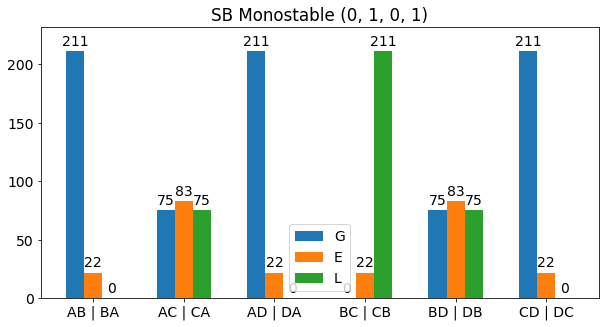

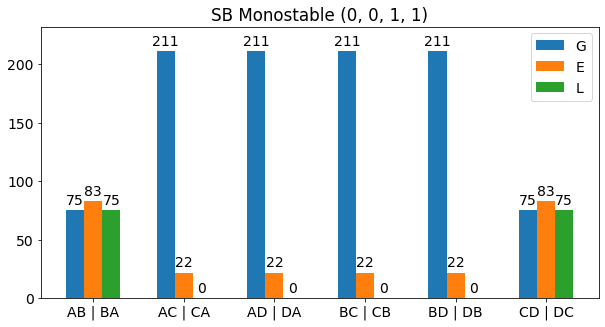

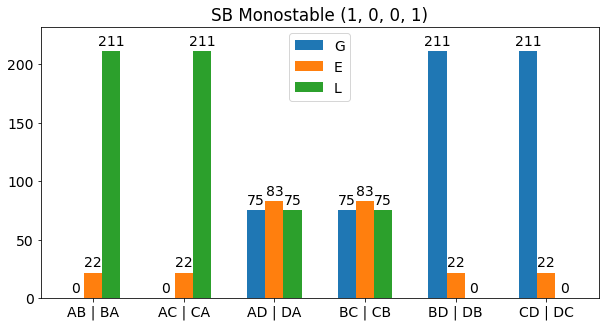

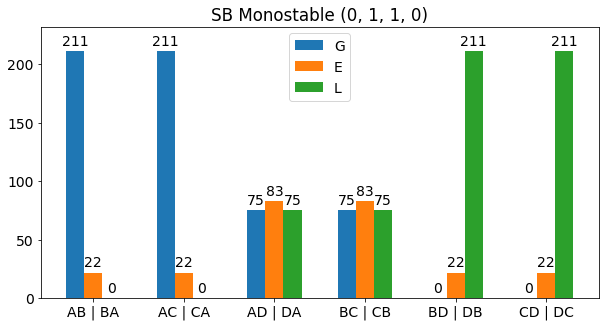

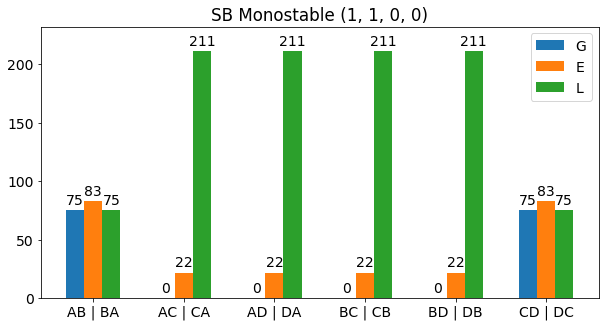

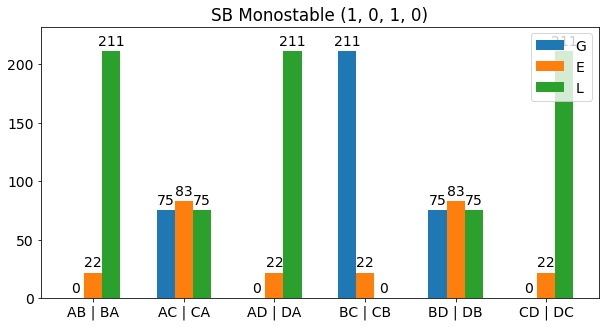

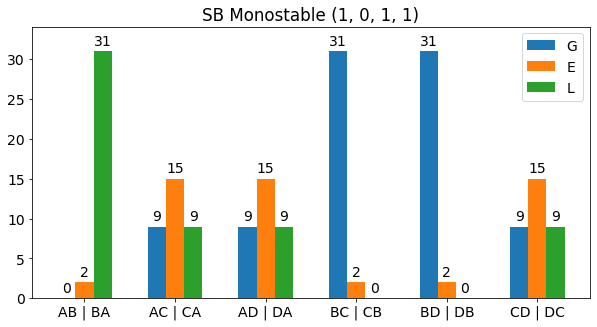

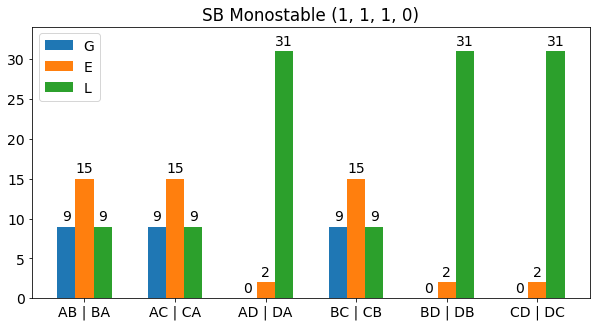

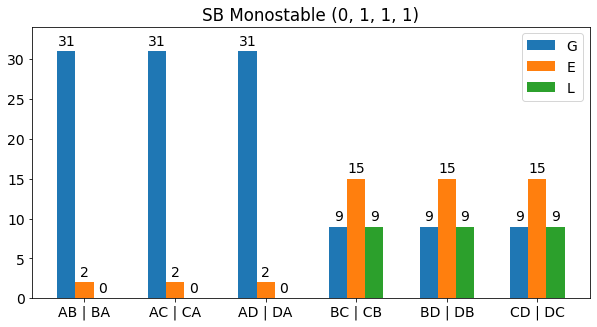

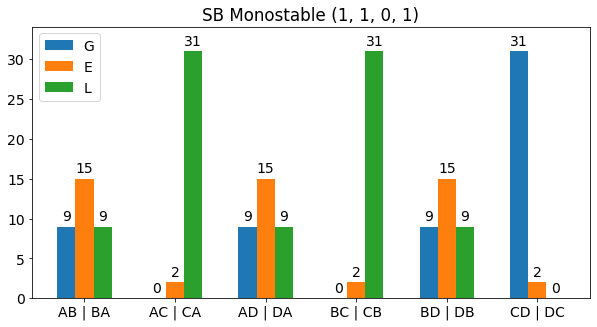

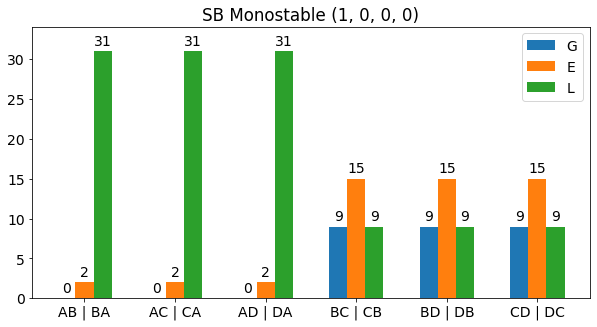

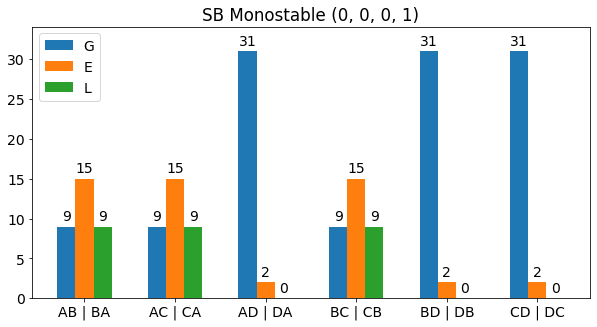

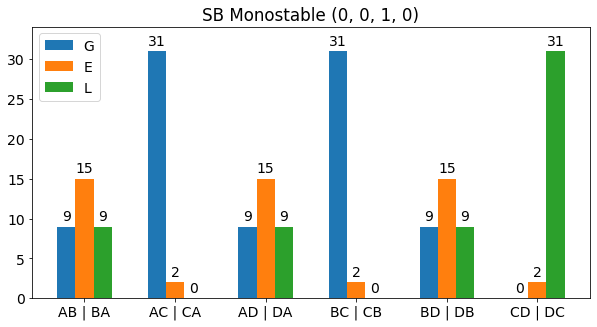

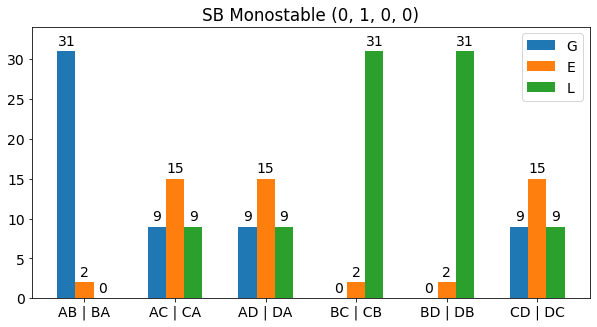

In [49]:
for fp in data_by_fp:
   if fp not in [(0, 0, 0, 0), (3, 3, 3, 3)]:
      data = {
         'G': data_by_fp[fp]['G'],
         'E': data_by_fp[fp]['E'],
         'L': data_by_fp[fp]['L'],
      }

      labels = ['AB | BA', 'AC | CA', 'AD | DA', 'BC | CB', 'BD | DB', 'CD | DC']
      bar_width = 0.2
      x_pos = np.arange(len(labels))
      fig, ax = plt.subplots(figsize=(10,5))

      # Loop through each group of bars and create a set of bars for each group
      for i, (group, values) in enumerate(data.items()):
         # Calculate the x-axis position for the current group of bars
         pos = x_pos + (i * bar_width)
         # Create a set of bars for the current group
         rects = ax.bar(pos, values, width=bar_width, label=group)
         ax.bar_label(rects, padding=3)
         
      # Set the x-axis labels and tick positions
      ax.set_xticks(x_pos + ((len(data) - 1) / 2) * bar_width)
      ax.set_xticklabels(labels)

      ax.legend()

      ax.set_title('SB Monostable ' + str(tuple([int(i/3) for i in fp])))
      m =  max(max(data_by_fp[fp]['G']), max(data_by_fp[fp]['L']))
      ax.set_ylim(0,m+.1*m)
      # Show the plot
      figname = '/home/elizabeth/Desktop/Tetrahedron/figures/SB_Monostable_'+str(fp)+'.png'
      plt.savefig(figname)
      plt.show()

In [53]:
data_by_fp = {}
Done = []
for fp1 in all_states:
    for fp2 in all_states:
        if fp1 != fp2:
            if (fp1, fp2) not in Done:
                Done.append((fp1, fp2))
                Done.append((fp2, fp1))

                data_by_fp[(fp1,fp2)] = {'G':[], 'L':[], 'E':[]}
                fp1_string = 'FP { ' + str(fp1[0]) + ', ' + str(fp1[1]) + ', ' + str(fp1[2]) + ', ' + str(fp1[3]) + ' }'
                fp2_string = 'FP { ' + str(fp2[0]) + ', ' + str(fp2[1]) + ', ' + str(fp2[2]) + ', ' + str(fp2[3]) + ' }'
                data_labels = []
                for pair in pairs:
                    node1 = pair[0] + ' :'
                    t1 = 'T['+pair[0]+'->'+pair[1]+']'
                    node2 = pair[1] + ' :'
                    t2 = 'T['+pair[1]+'->'+pair[0]+']'

                    data_labels.append(pair[0]+pair[1])
                    data_labels.append(pair[0]+pair[1]+'e')
                    data_labels.append(pair[1]+pair[0])

                    ineq = get_inequalities_for_FPs(strict_Bool_results,[fp1_string, fp2_string],network_location,net_name)
                    if ineq != []:

                        node1_greater = 0
                        node2_greater = 0
                        equal = 0
                        for i in ineq:
                        # print(i[i.find(node1):i.find(t1)])
                            u1 = i[i.find(node1):i.find(t1)].count('p')
                            #print(i[i.find(node2):i.find(t2)])
                            u2 = i[i.find(node2):i.find(t2)].count('p')
                            if u1 > u2:
                                node1_greater += 1
                            if u1 == u2:
                                equal += 1
                            if u1 < u2:
                                node2_greater += 1
                        #print(pair, fp, node1_greater, equal, node2_greater, len(ineq))
                        data_by_fp[(fp1, fp2)]['G'].append(node1_greater)
                        data_by_fp[(fp1, fp2)]['L'].append(node2_greater)
                        data_by_fp[(fp1, fp2)]['E'].append(equal)

In [54]:
print('FP & FP Label & I stronger J (G) & Count & J stronger I (L) & Count &  I Equal J (E)')
for fp in data_by_fp:
    fp_label = f'{int(fp[0][0]/3)}{int(fp[0][1]/3)}{int(fp[0][2]/3)}{int(fp[0][3]/3)} {int(fp[1][0]/3)}{int(fp[1][1]/3)}{int(fp[1][2]/3)}{int(fp[1][3]/3)} '
    for pair in pairs: 
        if data_by_fp[fp]['G'] != []:
            print(fp, ' & ',  fp_label, ' & ', pair[0]+pair[1], ' & ', data_by_fp[fp]['G'][pairs.index(pair)], ' & ', pair[1]+pair[0], ' & ', data_by_fp[fp]['L'][pairs.index(pair)], ' &  E & ', data_by_fp[fp]['E'][pairs.index(pair)])

FP & FP Label & I stronger J (G) & Count & J stronger I (L) & Count &  I Equal J (E)
((0, 3, 0, 3), (0, 0, 3, 3))  &  0101 0011   &  AB  &  129  &  BA  &  6  &  E &  34
((0, 3, 0, 3), (0, 0, 3, 3))  &  0101 0011   &  AC  &  129  &  CA  &  6  &  E &  34
((0, 3, 0, 3), (0, 0, 3, 3))  &  0101 0011   &  AD  &  161  &  DA  &  0  &  E &  8
((0, 3, 0, 3), (0, 0, 3, 3))  &  0101 0011   &  BC  &  54  &  CB  &  54  &  E &  61
((0, 3, 0, 3), (0, 0, 3, 3))  &  0101 0011   &  BD  &  129  &  DB  &  6  &  E &  34
((0, 3, 0, 3), (0, 0, 3, 3))  &  0101 0011   &  CD  &  129  &  DC  &  6  &  E &  34
((0, 3, 0, 3), (3, 0, 0, 3))  &  0101 1001   &  AB  &  54  &  BA  &  54  &  E &  61
((0, 3, 0, 3), (3, 0, 0, 3))  &  0101 1001   &  AC  &  6  &  CA  &  129  &  E &  34
((0, 3, 0, 3), (3, 0, 0, 3))  &  0101 1001   &  AD  &  129  &  DA  &  6  &  E &  34
((0, 3, 0, 3), (3, 0, 0, 3))  &  0101 1001   &  BC  &  6  &  CB  &  129  &  E &  34
((0, 3, 0, 3), (3, 0, 0, 3))  &  0101 1001   &  BD  &  129  &  DB  &  6  &  

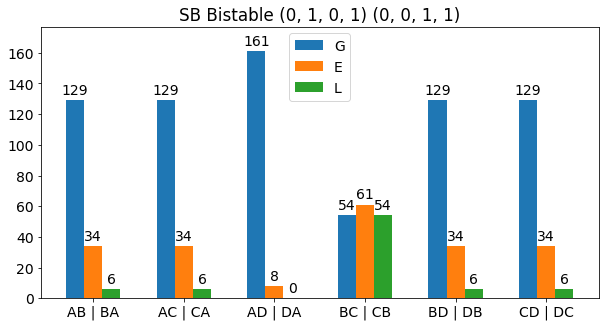

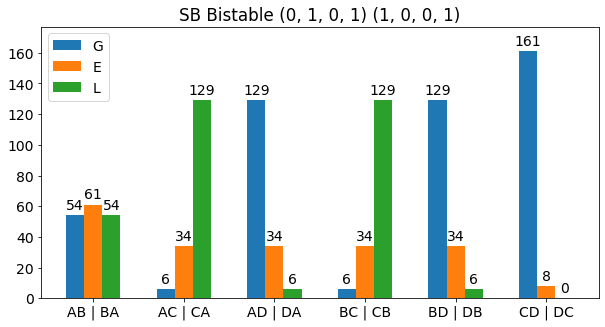

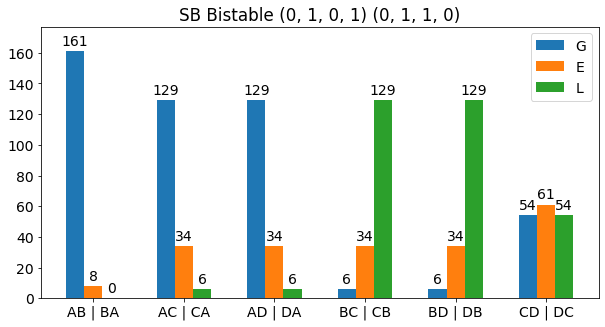

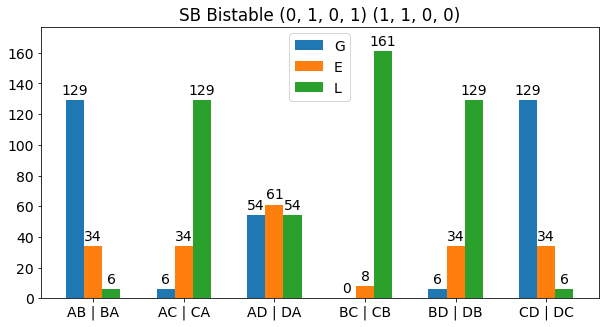

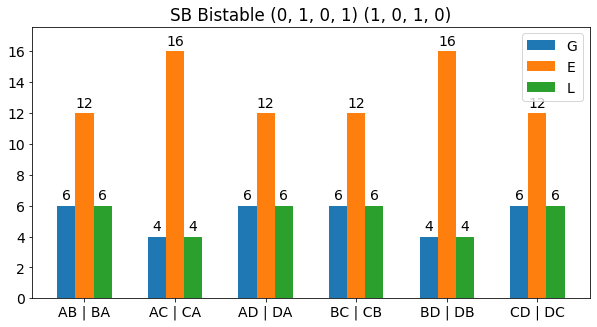

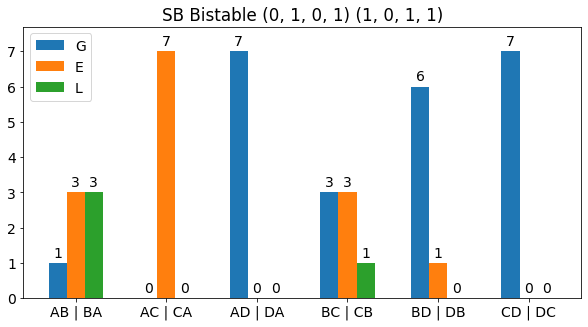

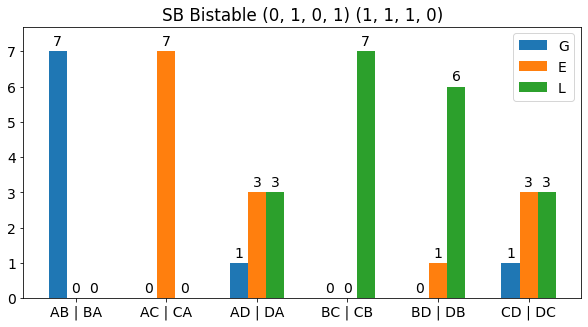

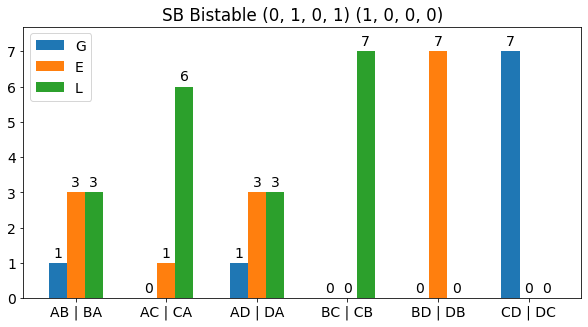

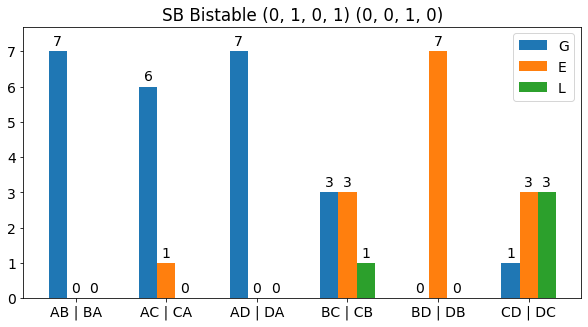

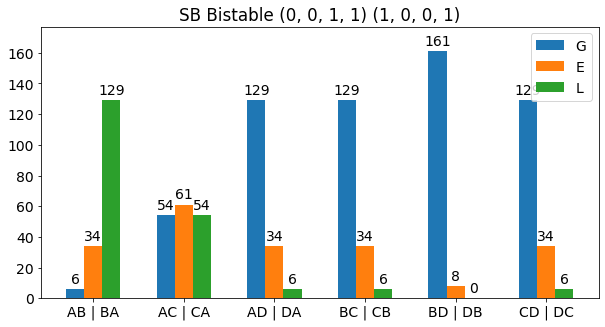

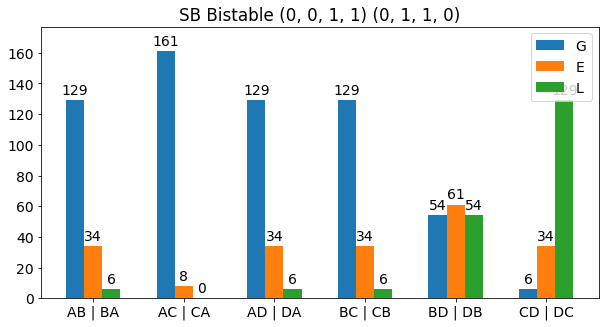

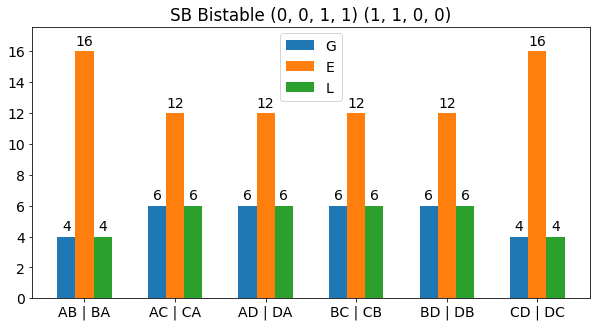

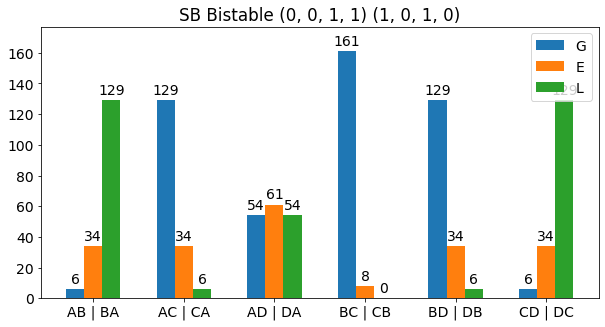

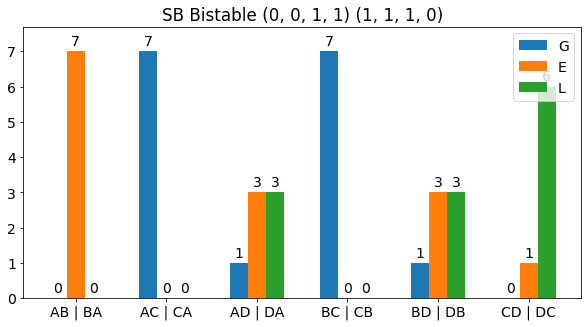

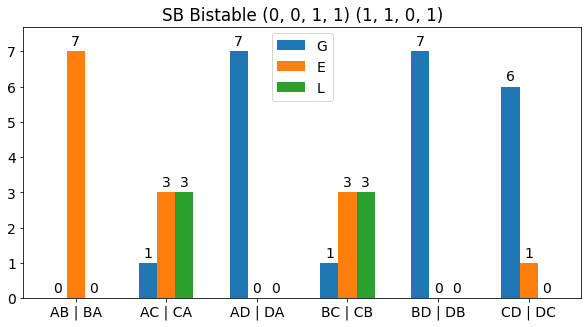

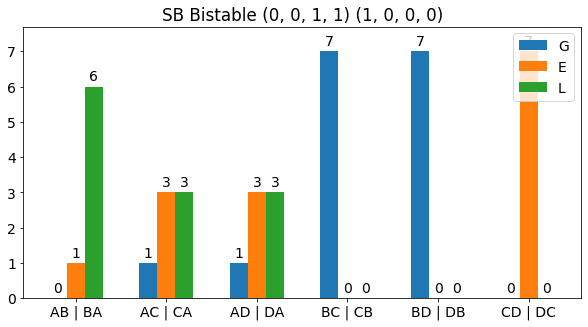

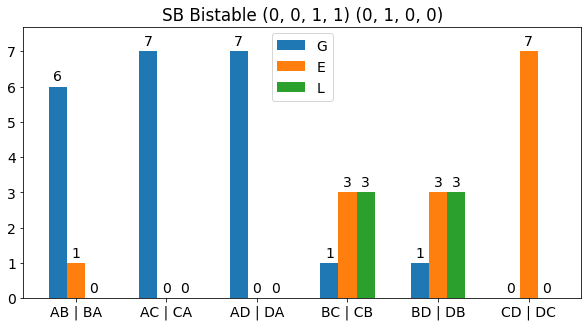

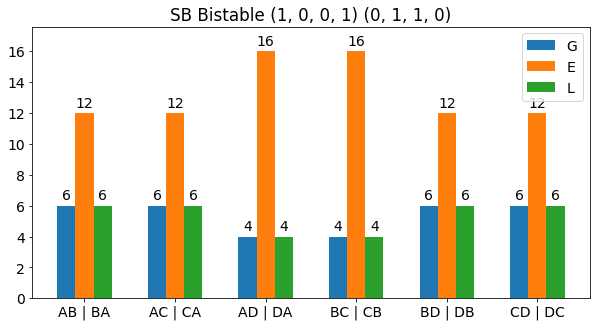

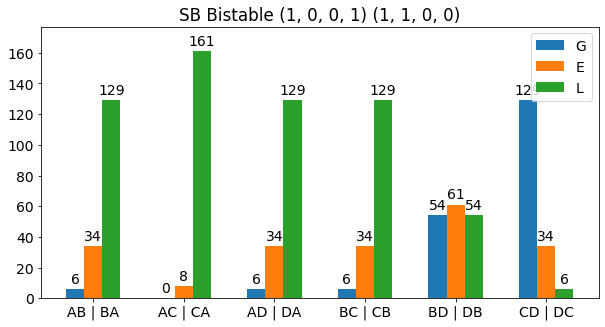

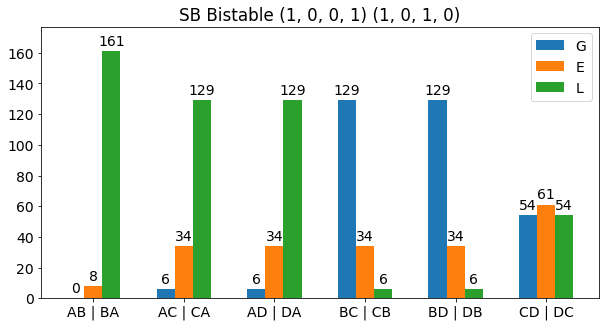

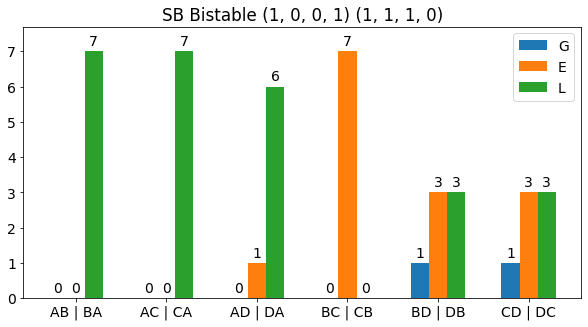

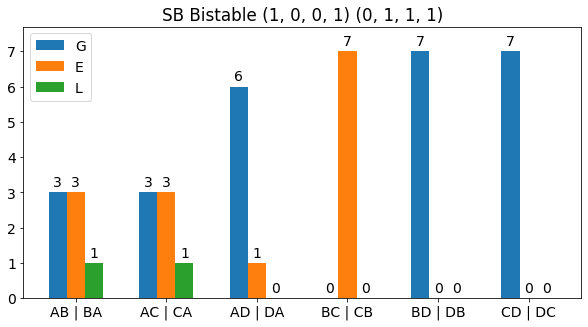

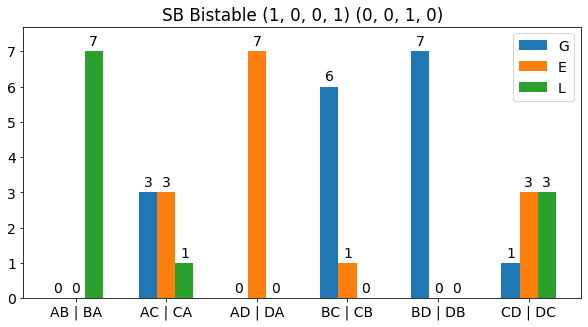

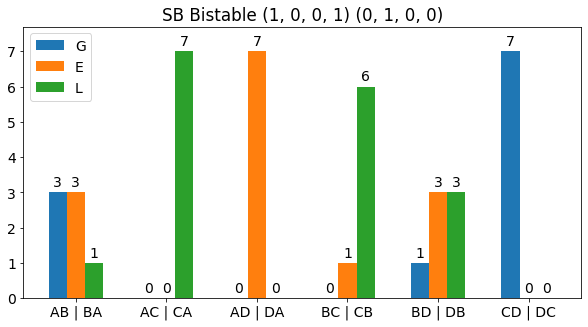

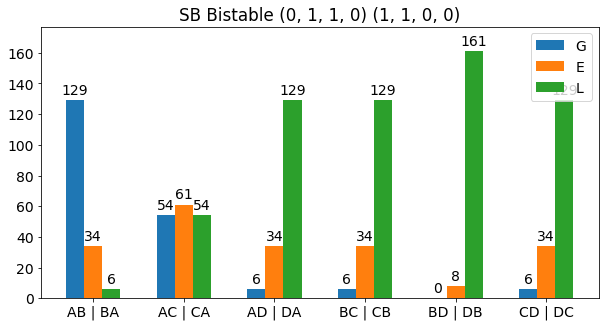

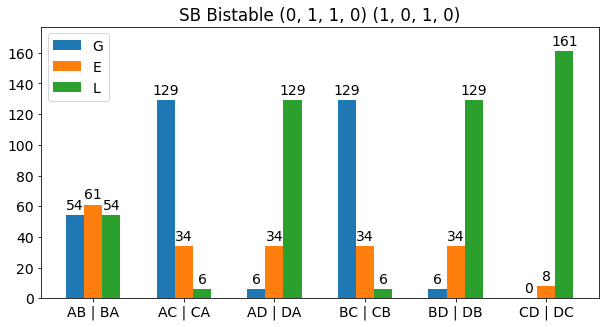

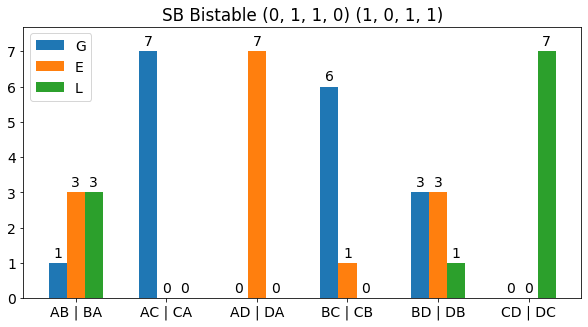

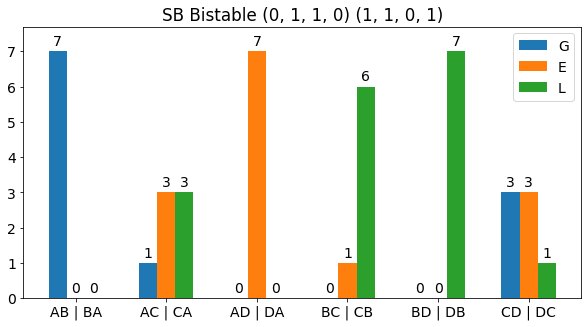

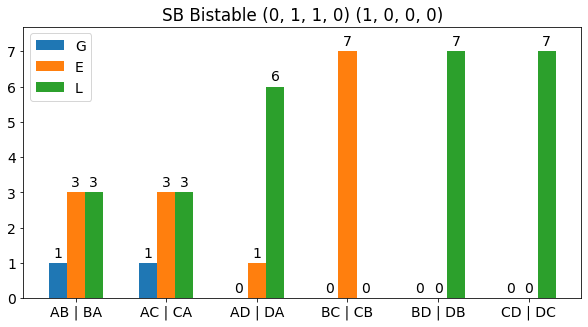

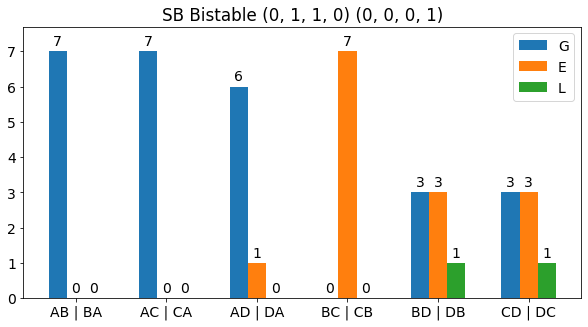

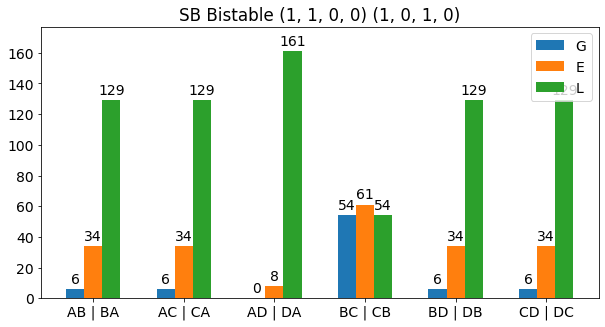

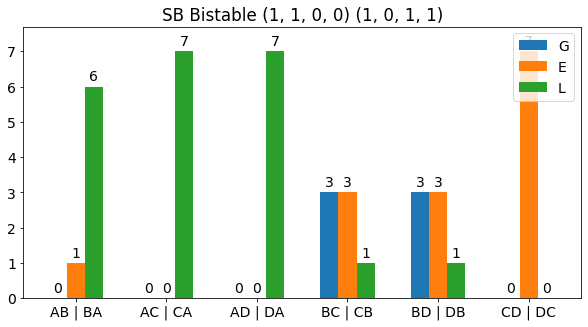

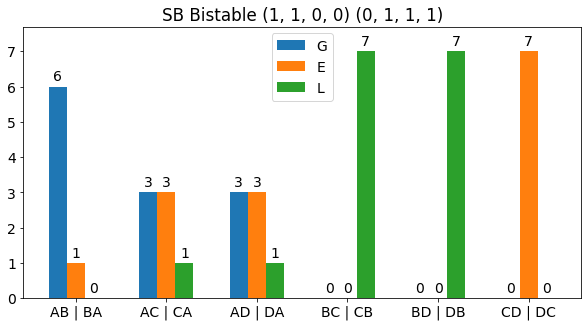

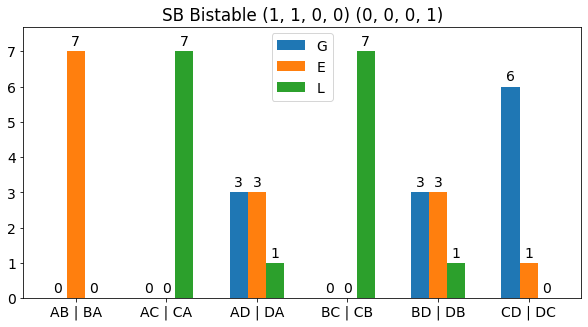

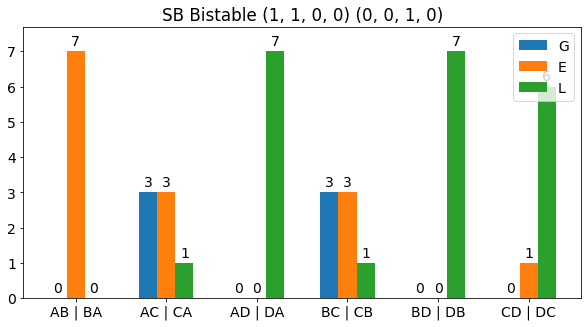

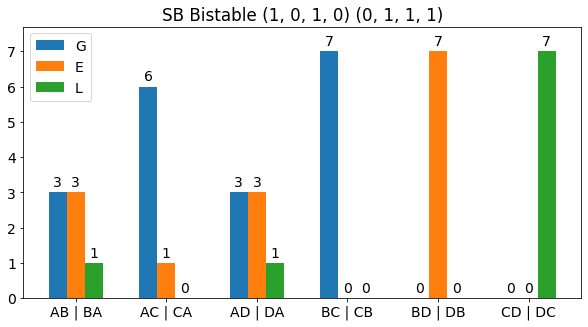

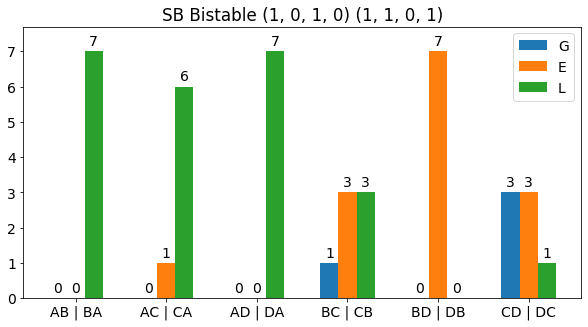

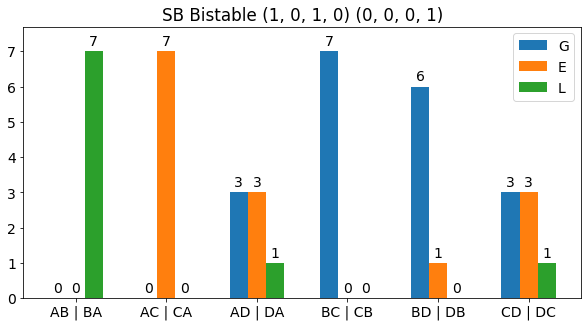

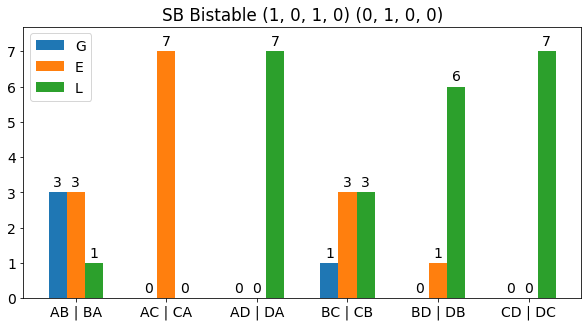

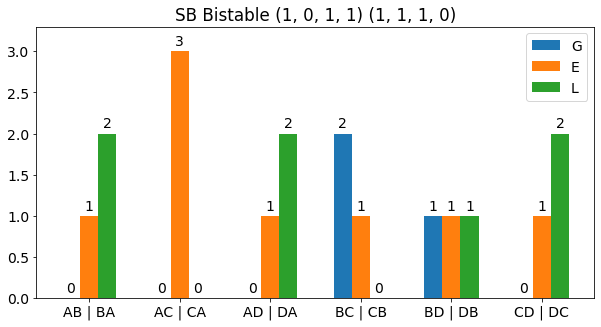

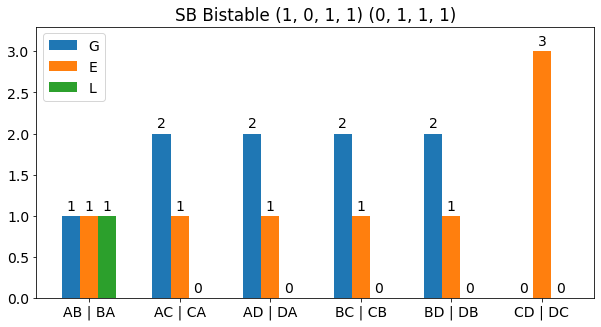

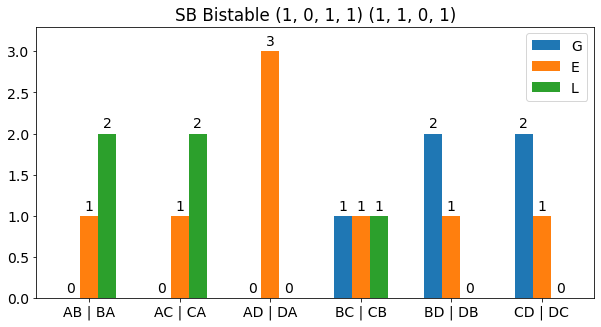

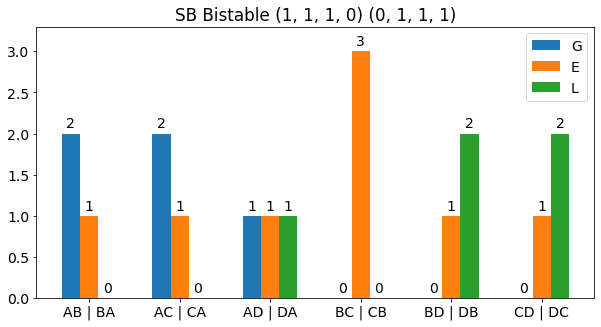

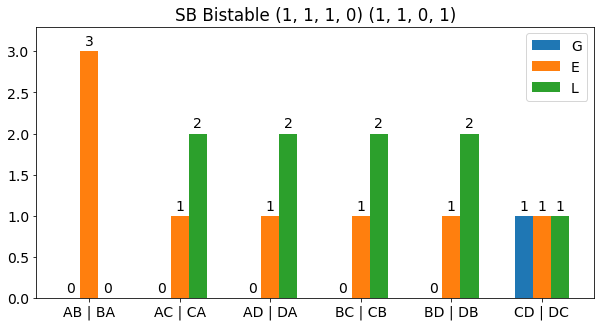

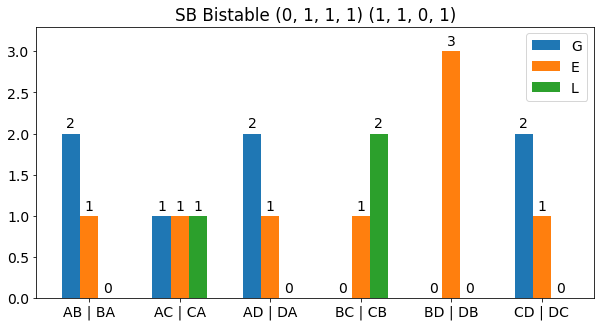

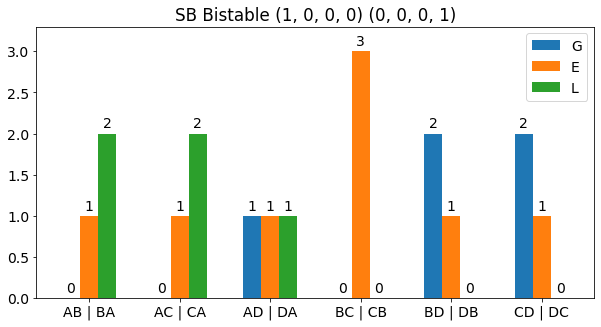

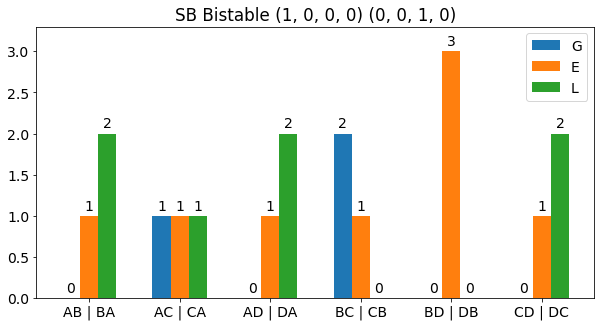

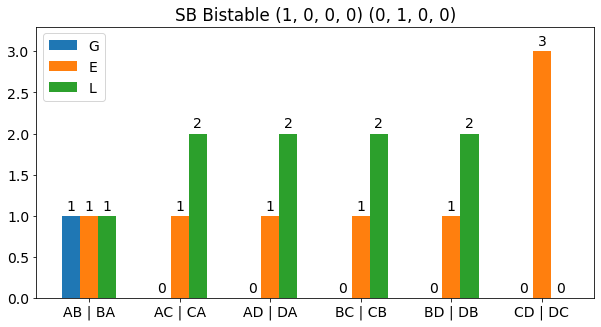

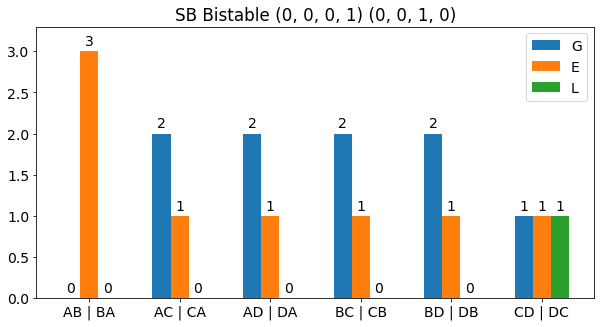

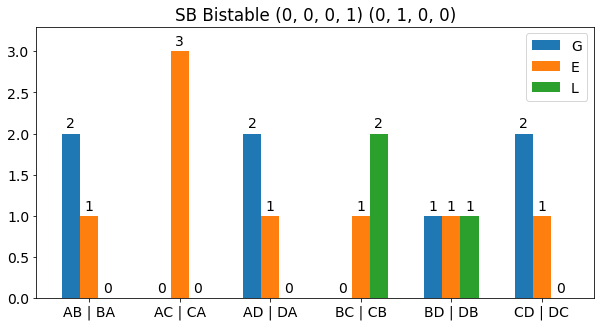

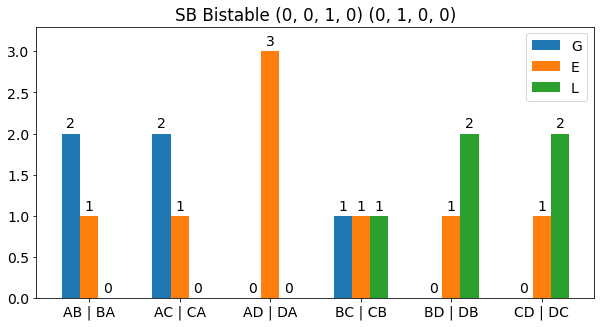

In [52]:
for fp in data_by_fp:
    if (data_by_fp[fp]['G'], data_by_fp[fp]['E'], data_by_fp[fp]['L']) != ([], [], []):
        data = {
            'G': data_by_fp[fp]['G'],
            'E': data_by_fp[fp]['E'],
            'L': data_by_fp[fp]['L'],
        }

        labels = ['AB | BA', 'AC | CA', 'AD | DA', 'BC | CB', 'BD | DB', 'CD | DC']
        bar_width = 0.2
        x_pos = np.arange(len(labels))
        fig, ax = plt.subplots(figsize=(10,5))

        # Loop through each group of bars and create a set of bars for each group
        for i, (group, values) in enumerate(data.items()):
            # Calculate the x-axis position for the current group of bars
            pos = x_pos + (i * bar_width)
            # Create a set of bars for the current group
            rects = ax.bar(pos, values, width=bar_width, label=group)
            ax.bar_label(rects, padding=3)
            
        # Set the x-axis labels and tick positions
        ax.set_xticks(x_pos + ((len(data) - 1) / 2) * bar_width)
        ax.set_xticklabels(labels)

        ax.legend()

        ax.set_title('SB Bistable ' + str(tuple([int(i/3) for i in fp[0]])) + ' ' + str(tuple([int(i/3) for i in fp[1]])))
        m =  max(max(data_by_fp[fp]['G']), max(data_by_fp[fp]['L']), max(data_by_fp[fp]['E']))
        ax.set_ylim(0,m+.1*m)
        # Show the plot
        figname = '/home/elizabeth/Desktop/Tetrahedron/figures/SB_Bistable_'+str(fp)+'.png'
        plt.savefig(figname)
        plt.show()